In [93]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
from adjustText import adjust_text
from IPython.display import Image
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import sys
site_packages = [p for p in sys.path if 'site-packages' in p]
print (site_packages)

['C:\\Users\\User\\Anaconda3\\envs\\data_env\\lib\\site-packages', 'C:\\Users\\User\\Anaconda3\\envs\\data_env\\lib\\site-packages\\win32', 'C:\\Users\\User\\Anaconda3\\envs\\data_env\\lib\\site-packages\\win32\\lib', 'C:\\Users\\User\\Anaconda3\\envs\\data_env\\lib\\site-packages\\Pythonwin', 'C:\\Users\\User\\Anaconda3\\envs\\data_env\\lib\\site-packages\\IPython\\extensions']


In [96]:
import requests

url = 'https://www.worldometers.info/coronavirus/#countries'
url2 = 'https://www.worldometers.info/world-population/population-by-country/'
url3 = 'https://github.com/COVID19Tracking/covid-tracking-data/raw/master/data/states_daily_4pm_et.csv'
r1 = requests.get(url)
r2 = requests.get(url2)

a = pd.read_html(r1.text)[0]
b = pd.read_html(r2.text)[0]
usa_covid19 = pd.read_csv(url3, parse_dates=['date'])

In [98]:
usa_covid19

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-28,AK,351.0,16738.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,228.0,6d6333484b758bb236b3f2fa9857f40c52a59d0a,2020-04-28T20:00:00Z,9.0,NaN,17089.0,17089.0,17089.0,2,0.0,0.0,827.0,6.0,833.0
1,2020-04-28,AL,6687.0,69140.0,NaN,NaN,911.0,NaN,335.0,NaN,195.0,NaN,ba9dbab92f047c4b4b3e3857de416e7cb174b05e,2020-04-28T20:00:00Z,242.0,911.0,75827.0,75827.0,75827.0,1,20.0,39.0,1642.0,188.0,1830.0
2,2020-04-28,AR,3111.0,37560.0,NaN,104.0,NaN,NaN,NaN,20.0,NaN,1146.0,6310b3c9131a8d988038f31a216d268bce711cb5,2020-04-28T20:00:00Z,52.0,NaN,40671.0,40671.0,40671.0,5,2.0,0.0,120.0,94.0,214.0
3,2020-04-28,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cb1dd833c2e825a207b819e419821f0f66cf61ed,2020-04-28T20:00:00Z,0.0,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,2020-04-28,AZ,6948.0,60490.0,NaN,737.0,1095.0,303.0,NaN,193.0,NaN,1450.0,794b840cd5db415c34fde311f79479b9e3b3df36,2020-04-28T20:00:00Z,293.0,1095.0,67438.0,67438.0,67438.0,4,18.0,44.0,663.0,232.0,895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,2020-01-26,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405aae8b4155c77878ab1e2a85f32d7bb7a45c9a,2020-01-26T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3037,2020-01-25,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f17fc4cde1b2e7b57e946752d620e48d7f02c7ce,2020-01-25T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3038,2020-01-24,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4763cdf13300976ba41317d7c7767e1c558a1134,2020-01-24T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
3039,2020-01-23,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,faa0d0b985f479eac50082e417dc84f9e645db8f,2020-01-23T21:00:00Z,NaN,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0


In [99]:
a.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,World,3148687,"+12,179",218371.0,558.0,962406.0,1967910,56903.0,404.0,28.0,NaN,NaN
1,USA,1035765,NaN,59266.0,NaN,142238.0,834261,15298.0,3129.0,179.0,5919847.0,17885.0
2,Spain,232128,NaN,23822.0,NaN,123903.0,84403,7764.0,4965.0,510.0,1345560.0,28779.0
3,Italy,201505,NaN,27359.0,NaN,68941.0,105205,1863.0,3333.0,453.0,1846934.0,30547.0
4,France,165911,NaN,23660.0,NaN,46886.0,95365,4387.0,2542.0,362.0,463662.0,7103.0


In [100]:
b.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [101]:
a['Country,Other'].sort_values().tail(60)

29                     Poland
17                   Portugal
31                      Qatar
32                    Romania
8                      Russia
129                    Rwanda
113                   Réunion
34                   S. Korea
187     Saint Kitts and Nevis
188               Saint Lucia
170              Saint Martin
210     Saint Pierre Miquelon
103                San Marino
202     Sao Tome and Principe
19               Saudi Arabia
90                    Senegal
38                     Serbia
196                Seychelles
145              Sierra Leone
24                  Singapore
156              Sint Maarten
80                   Slovakia
79                   Slovenia
105                   Somalia
49               South Africa
173               South Sudan
2                       Spain
101                 Sri Lanka
206                 St. Barth
189    St. Vincent Grenadines
121                     Sudan
198                  Suriname
21                     Sweden
16        

In [102]:
# for a,b in zip(a.Country.sort_values().tolist(),b.Country.sort_values().tolist()):
#     print(a,b)

In [103]:
a.rename(columns={'Country,Other':'Country',
                  "Tot Cases/1M pop":"Tot Cases_1M pop",
                  "Tot Deaths/1M pop":"Tot Deaths_1M pop",
                  "Serious,Critical":"Serious",
                  "Tot\xa0Cases/1M pop":"Tot Cases_1M"}, inplace=True)

b.rename(columns={'Country (or dependency)':'Country', 'Med. Age':'MedAg'}, inplace=True)
b.Country.replace({'United States':'USA',"United Kingdom":'UK','South Korea':'S. Korea'}, inplace= True)
# df.rename(columns={"S. Korea": "South Korea",
#                    "USA"     : "United States",
#                    "UK"     :  "United Kingdom"},
#                    inplace=True)

In [104]:
# merge a and b to one data set
df = a.merge(b)

In [105]:
df.head(18)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases_1M,Deaths/1M pop,TotalTests,Tests/ 1M pop,#,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,MedAg,Urban Pop %,World Share
0,USA,1035765,NaN,59266.0,NaN,142238.0,834261,15298.0,3129.0,179.0,5919847.0,17885.0,3,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
1,Spain,232128,NaN,23822.0,NaN,123903.0,84403,7764.0,4965.0,510.0,1345560.0,28779.0,30,46754778,0.04 %,18002,94,498800,40000.0,1.3,45,80 %,0.60 %
2,Italy,201505,NaN,27359.0,NaN,68941.0,105205,1863.0,3333.0,453.0,1846934.0,30547.0,23,60461826,-0.15 %,-88249,206,294140,148943.0,1.3,47,69 %,0.78 %
3,France,165911,NaN,23660.0,NaN,46886.0,95365,4387.0,2542.0,362.0,463662.0,7103.0,22,65273511,0.22 %,143783,119,547557,36527.0,1.9,42,82 %,0.84 %
4,UK,161145,NaN,21678.0,NaN,NaN,139123,1559.0,2374.0,319.0,763387.0,11245.0,21,67886011,0.53 %,355839,281,241930,260650.0,1.8,40,83 %,0.87 %
5,Germany,159912,NaN,6314.0,NaN,120400.0,33198,2409.0,1909.0,75.0,2072669.0,24738.0,19,83783942,0.32 %,266897,240,348560,543822.0,1.6,46,76 %,1.07 %
6,Turkey,114653,NaN,2992.0,NaN,38809.0,72852,1621.0,1359.0,35.0,948115.0,11242.0,17,84339067,1.09 %,909452,110,769630,283922.0,2.1,32,76 %,1.08 %
7,Russia,99399,"+5,841",972.0,105.0,10286.0,88141,2300.0,681.0,7.0,3303717.0,22638.0,9,145934462,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
8,Iran,92584,NaN,5877.0,NaN,72439.0,14268,2983.0,1102.0,70.0,442590.0,5269.0,18,83992949,1.30 %,1079043,52,1628550,-55000.0,2.2,32,76 %,1.08 %
9,Brazil,73235,+336,5083.0,20.0,32544.0,35608,8318.0,345.0,24.0,339552.0,1597.0,6,212559417,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            198 non-null    object 
 1   TotalCases         198 non-null    int64  
 2   NewCases           45 non-null     object 
 3   TotalDeaths        165 non-null    float64
 4   NewDeaths          26 non-null     float64
 5   TotalRecovered     192 non-null    float64
 6   ActiveCases        198 non-null    int64  
 7   Serious            133 non-null    float64
 8   Tot Cases_1M       198 non-null    float64
 9   Deaths/1M pop      165 non-null    float64
 10  TotalTests         168 non-null    float64
 11  Tests/ 1M pop      168 non-null    float64
 12  #                  198 non-null    int64  
 13  Population (2020)  198 non-null    int64  
 14  Yearly Change      198 non-null    object 
 15  Net Change         198 non-null    int64  
 16  Density (P/Km²)    198 non

In [107]:
df['Cases/Test'] = df['TotalCases'] / df['TotalTests']
df['Deaths/Cases'] = df['TotalDeaths'] / df['TotalCases']

In [108]:
df.drop(['#','Yearly Change','NewDeaths','Migrants (net)','Land Area (Km²)','World Share','Net Change','Land Area (Km²)'],
        axis=1, inplace=True) # Drop column
df.set_index('Country').drop(index='China', inplace=True)
# Rename columns
df.rename(columns={"S. Korea": "South Korea",
                   "USA"     : "United States",
                   "UK"     :  "United Kingdom"},
                   inplace=True)

In [109]:
df[['Urban Pop %', 'Density (P/Km²)', 'Fert. Rate']].head()

,Urban Pop %,Density (P/Km²),Fert. Rate
0,83 %,36,1.8
1,80 %,94,1.3
2,69 %,206,1.3
3,82 %,119,1.9
4,83 %,281,1.8


In [110]:
# Change data types
df['Urban Pop %'] = df['Urban Pop %'].str.replace("%","").replace("N.A.",np.nan).astype('float')
df['Density (P/Km²)'] = df['Density (P/Km²)'].astype('int64')
df['Fert. Rate'] = df['Fert. Rate'].replace("N.A.",np.nan).astype('float')
df['NewCases'] = df['NewCases'].str[1:].str.replace(",","").fillna(0).astype(float)
df['MedAg'] = df['MedAg'].str.replace("N.A.",'0').astype('int64')
df.fillna(0, inplace=True)

In [111]:
df = df.set_index('Country')
df.drop(index='China', inplace=True)

In [112]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
TotalCases,197.0,15452.3,79893.0,1.0,76.0,553.0,4127.0,1.035765e+06
NewCases,197.0,61.6,433.0,0.0,0.0,0.0,0.0,5.841000e+03
TotalDeaths,197.0,1083.1,5459.4,0.0,1.0,10.0,93.0,5.926600e+04
TotalRecovered,197.0,4455.6,17924.6,0.0,19.0,181.0,1134.0,1.422380e+05
ActiveCases,197.0,9910.6,61682.6,0.0,31.0,262.0,1907.0,8.342610e+05
Serious,197.0,288.2,1425.1,0.0,0.0,3.0,39.0,1.529800e+04
Tot Cases_1M,197.0,811.2,1709.2,0.0,31.0,169.0,885.0,1.629800e+04
Deaths/1M pop,197.0,41.6,126.0,0.0,0.3,3.0,21.0,1.208000e+03
TotalTests,197.0,148161.2,537432.0,0.0,714.0,10918.0,90899.0,5.919847e+06
Tests/ 1M pop,197.0,11037.3,20164.1,0.0,277.0,2551.0,12724.0,1.402080e+05


In [113]:
df

,TotalCases,NewCases,TotalDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases_1M,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population (2020),Density (P/Km²),Fert. Rate,MedAg,Urban Pop %,Cases/Test,Deaths/Cases
Country,,,,,,,,,,,,,,,,,
USA,1035765,0.0,59266.0,142238.0,834261,15298.0,3129.00,179.0,5919847.0,17885.0,331002651,36,1.8,38,83.0,0.174965,0.057220
Spain,232128,0.0,23822.0,123903.0,84403,7764.0,4965.00,510.0,1345560.0,28779.0,46754778,94,1.3,45,80.0,0.172514,0.102624
Italy,201505,0.0,27359.0,68941.0,105205,1863.0,3333.00,453.0,1846934.0,30547.0,60461826,206,1.3,47,69.0,0.109102,0.135773
France,165911,0.0,23660.0,46886.0,95365,4387.0,2542.00,362.0,463662.0,7103.0,65273511,119,1.9,42,82.0,0.357827,0.142607
UK,161145,0.0,21678.0,0.0,139123,1559.0,2374.00,319.0,763387.0,11245.0,67886011,281,1.8,40,83.0,0.211092,0.134525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
British Virgin Islands,6,0.0,1.0,3.0,2,0.0,198.00,33.0,0.0,0.0,30231,202,0.0,0,52.0,0.000000,0.166667
Western Sahara,6,0.0,0.0,5.0,1,0.0,10.00,0.0,0.0,0.0,597339,2,2.4,28,87.0,0.000000,0.000000
Caribbean Netherlands,5,0.0,0.0,0.0,5,0.0,191.00,0.0,110.0,4195.0,26223,80,0.0,0,75.0,0.045455,0.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, USA to Yemen
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TotalCases         197 non-null    int64  
 1   NewCases           197 non-null    float64
 2   TotalDeaths        197 non-null    float64
 3   TotalRecovered     197 non-null    float64
 4   ActiveCases        197 non-null    int64  
 5   Serious            197 non-null    float64
 6   Tot Cases_1M       197 non-null    float64
 7   Deaths/1M pop      197 non-null    float64
 8   TotalTests         197 non-null    float64
 9   Tests/ 1M pop      197 non-null    float64
 10  Population (2020)  197 non-null    int64  
 11  Density (P/Km²)    197 non-null    int64  
 12  Fert. Rate         197 non-null    float64
 13  MedAg              197 non-null    int64  
 14  Urban Pop %        197 non-null    float64
 15  Cases/Test         197 non-null    float64
 16  Deaths/Cases       197 non-

In [115]:
df.corr()

,TotalCases,NewCases,TotalDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases_1M,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population (2020),Density (P/Km²),Fert. Rate,MedAg,Urban Pop %,Cases/Test,Deaths/Cases
TotalCases,1.000000,0.073848,0.934941,0.791816,0.982322,0.895990,0.190117,0.241349,0.899472,0.060864,0.250349,-0.027346,-0.081166,0.168809,0.150560,0.100467,0.140810
NewCases,0.073848,1.000000,0.002351,0.028413,0.087192,0.114222,-0.002519,-0.005479,0.400592,0.025354,0.113218,0.004576,-0.046092,0.097655,0.055338,0.002755,-0.022886
TotalDeaths,0.934941,0.002351,1.000000,0.790425,0.892639,0.863210,0.235114,0.376512,0.802347,0.065309,0.207555,-0.030033,-0.093123,0.196138,0.166897,0.135180,0.259021
TotalRecovered,0.791816,0.028413,0.790425,1.000000,0.665041,0.824968,0.233975,0.307186,0.767937,0.097485,0.207367,-0.036746,-0.112046,0.230812,0.183408,0.107967,0.169122
ActiveCases,0.982322,0.087192,0.892639,0.665041,1.000000,0.844345,0.157400,0.189911,0.870814,0.044722,0.245623,-0.022081,-0.064304,0.134162,0.126886,0.086750,0.110205
Serious,0.895990,0.114222,0.863210,0.824968,0.844345,1.000000,0.185150,0.256756,0.794385,0.042815,0.237132,-0.034067,-0.091477,0.172143,0.179756,0.129981,0.167719
Tot Cases_1M,0.190117,-0.002519,0.235114,0.233975,0.157400,0.185150,1.000000,0.837654,0.161844,0.592606,-0.054285,0.072100,-0.397416,-0.104753,0.228957,0.201677,0.129298
Deaths/1M pop,0.241349,-0.005479,0.376512,0.307186,0.189911,0.256756,0.837654,1.000000,0.192076,0.254149,-0.016210,0.016005,-0.296827,-0.034715,0.243041,0.238452,0.389550
TotalTests,0.899472,0.400592,0.802347,0.767937,0.870814,0.794385,0.161844,0.192076,1.000000,0.102264,0.316520,-0.034392,-0.111163,0.233257,0.155930,0.042305,0.073113
Tests/ 1M pop,0.060864,0.025354,0.065309,0.097485,0.044722,0.042815,0.592606,0.254149,0.102264,1.000000,-0.091456,-0.000977,-0.398443,0.029856,0.194906,-0.038282,-0.143747


In [116]:
df_cor_age = df[df['TotalCases']>12000][['Deaths/Cases', 'MedAg']].sort_values('MedAg', ascending=False)
print(df_cor_age.corr())
df_cor_age.reset_index()

              Deaths/Cases     MedAg
Deaths/Cases      1.000000  0.341821
MedAg             0.341821  1.000000


,Country,Deaths/Cases,MedAg
0,Japan,0.028684,48
1,Italy,0.135773,47
2,Germany,0.039484,46
3,Portugal,0.038977,46
4,Spain,0.102624,45
5,Switzerland,0.058058,43
6,Austria,0.037052,43
7,Netherlands,0.118857,43
8,France,0.142607,42
9,Poland,0.048812,42


count    1.970000e+02
mean     1.545229e+04
std      7.989300e+04
min      1.000000e+00
25%      7.600000e+01
50%      5.530000e+02
75%      4.127000e+03
max      1.035765e+06
Name: TotalCases, dtype: float64


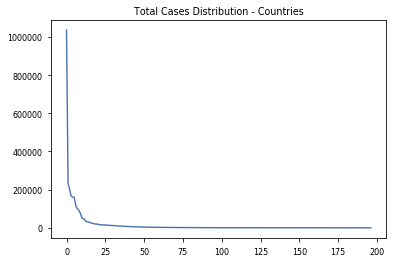

In [117]:
print(df['TotalCases'].describe())
df.reset_index()['TotalCases'].plot(title='Total Cases Distribution - Countries');

In [118]:
df['MedAg'].describe()

count    197.000000
mean      28.086294
std       12.623984
min        0.000000
25%       20.000000
50%       29.000000
75%       38.000000
max       48.000000
Name: MedAg, dtype: float64

In [119]:
df = df[df['MedAg']!=0]

In [120]:
df[df['TotalCases']>10000].corr()

,TotalCases,NewCases,TotalDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases_1M,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population (2020),Density (P/Km²),Fert. Rate,MedAg,Urban Pop %,Cases/Test,Deaths/Cases
TotalCases,1.000000,-0.019719,0.922328,0.746735,0.982556,0.875374,0.304840,0.256391,0.886910,0.097270,0.154178,-0.087206,-0.074261,0.098484,0.130858,0.182197,0.182320
NewCases,-0.019719,1.000000,-0.108103,-0.102849,0.011745,0.019161,-0.167766,-0.127984,0.347589,0.053755,0.029090,0.051602,0.005415,-0.005975,-0.045642,-0.158018,-0.144434
TotalDeaths,0.922328,-0.108103,1.000000,0.737826,0.880424,0.832642,0.440264,0.518965,0.761041,0.116777,0.094492,-0.101529,-0.141651,0.211851,0.171967,0.330274,0.461402
TotalRecovered,0.746735,-0.102849,0.737826,1.000000,0.611914,0.780297,0.376681,0.347575,0.700232,0.203249,0.070469,-0.127353,-0.159165,0.209275,0.135136,0.158969,0.227176
ActiveCases,0.982556,0.011745,0.880424,0.611914,1.000000,0.824294,0.246302,0.186257,0.866215,0.058563,0.167457,-0.067331,-0.039139,0.050311,0.114182,0.159046,0.129810
Serious,0.875374,0.019161,0.832642,0.780297,0.824294,1.000000,0.263685,0.270579,0.749356,0.000380,0.131468,-0.120542,-0.103563,0.064567,0.208910,0.302306,0.237618
Tot Cases_1M,0.304840,-0.167766,0.440264,0.376681,0.246302,0.263685,1.000000,0.731549,0.179673,0.708579,-0.292656,0.122375,-0.288473,0.362972,0.144690,0.278901,0.411985
Deaths/1M pop,0.256391,-0.127984,0.518965,0.347575,0.186257,0.270579,0.731549,1.000000,0.133179,0.301662,-0.160931,-0.111540,-0.250719,0.426260,0.274580,0.413276,0.850025
TotalTests,0.886910,0.347589,0.761041,0.700232,0.866215,0.749356,0.179673,0.133179,1.000000,0.196693,0.212326,-0.106719,-0.117732,0.159624,0.080993,-0.074011,0.026356
Tests/ 1M pop,0.097270,0.053755,0.116777,0.203249,0.058563,0.000380,0.708579,0.301662,0.196693,1.000000,-0.333618,0.088146,-0.311538,0.431146,0.058484,-0.294944,-0.030094


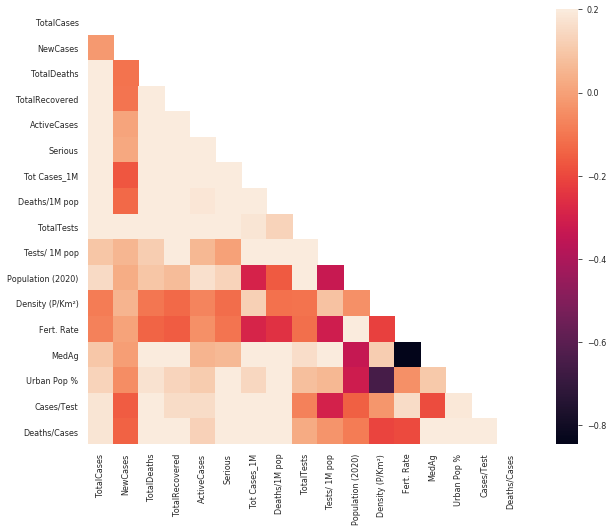

In [121]:
corr = df[df['TotalCases']>10000].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.2, square=True)
    sns.set(font_scale=1.5);


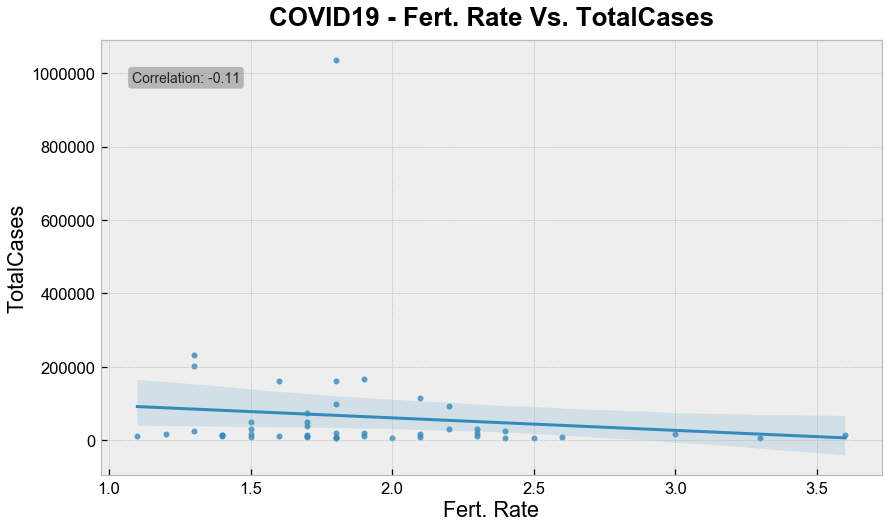

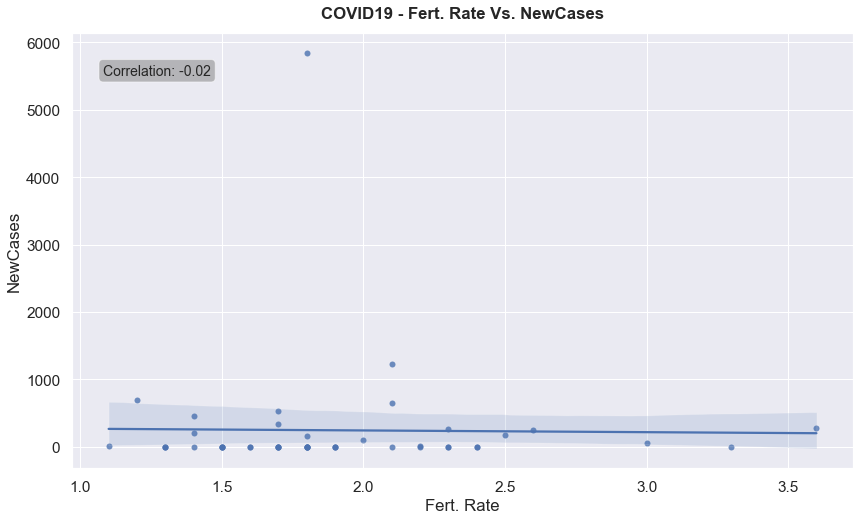

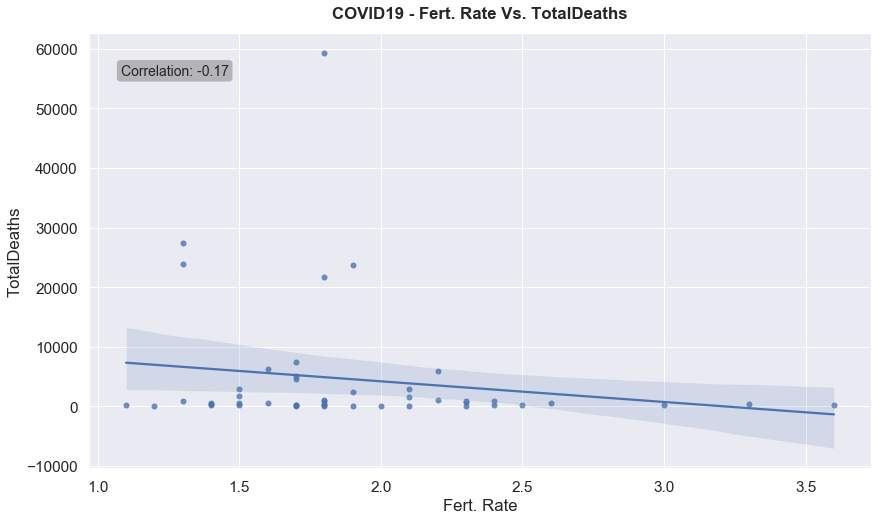

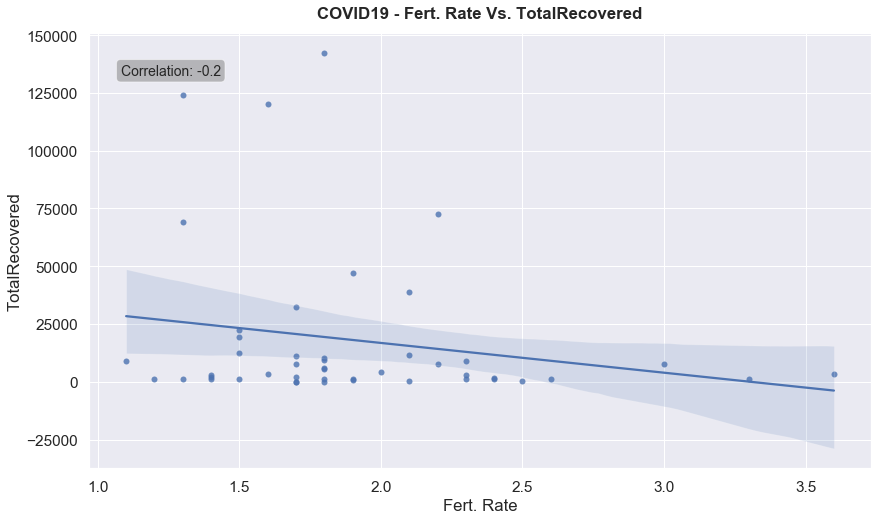

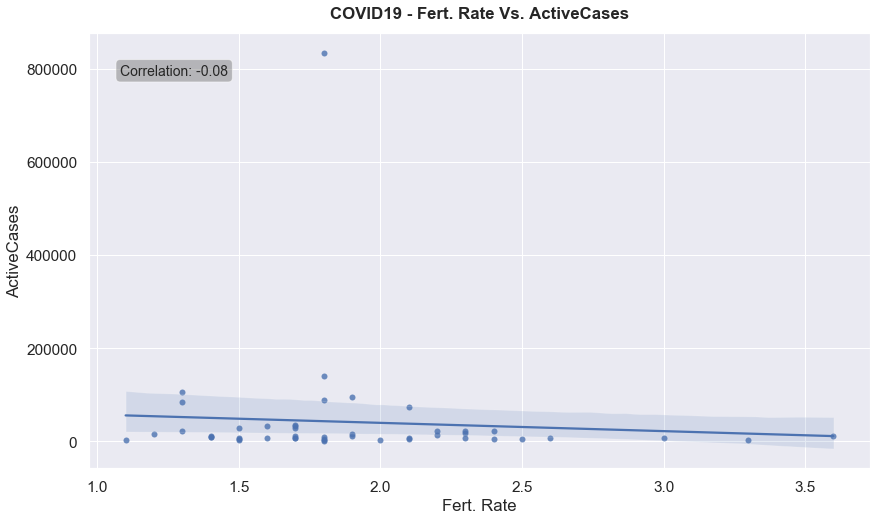

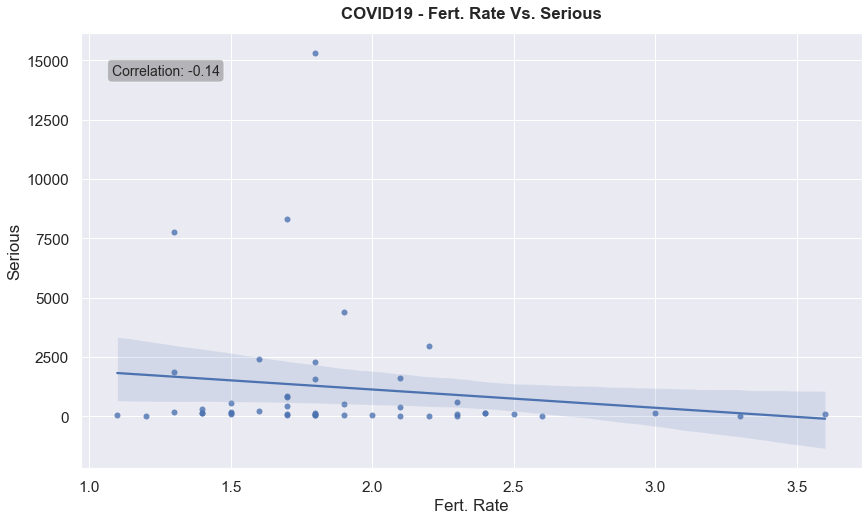

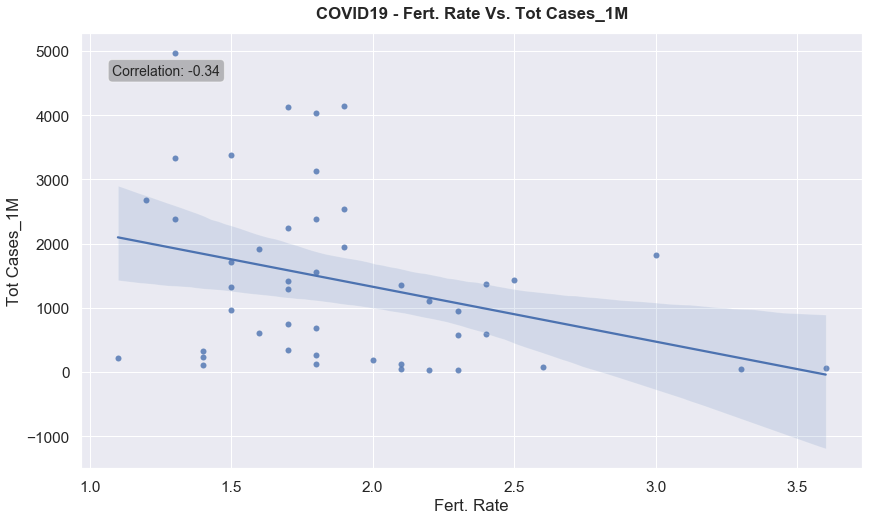

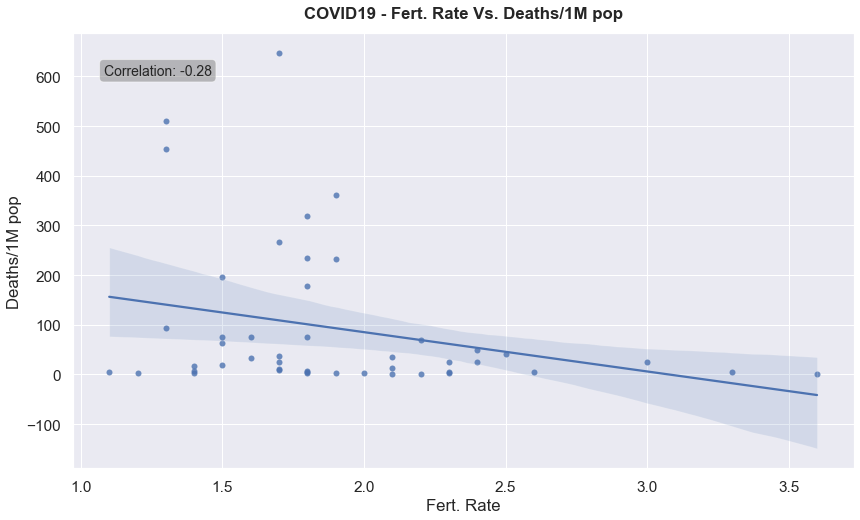

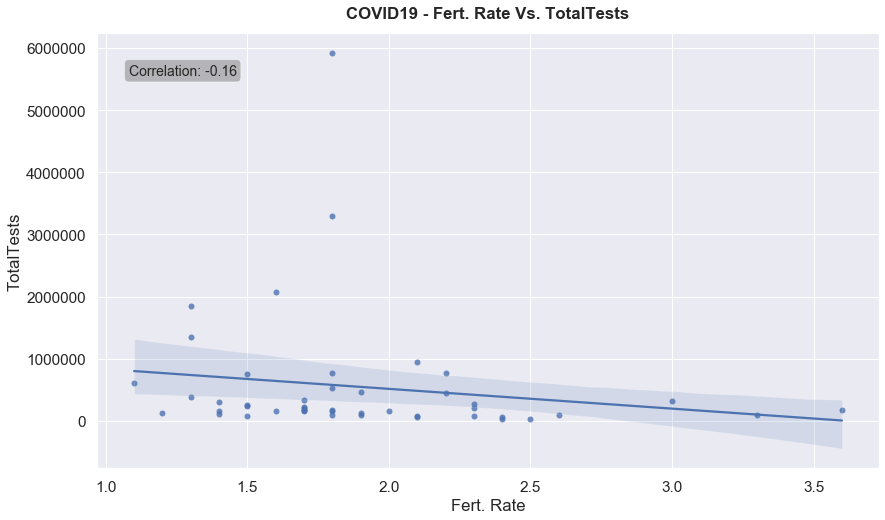

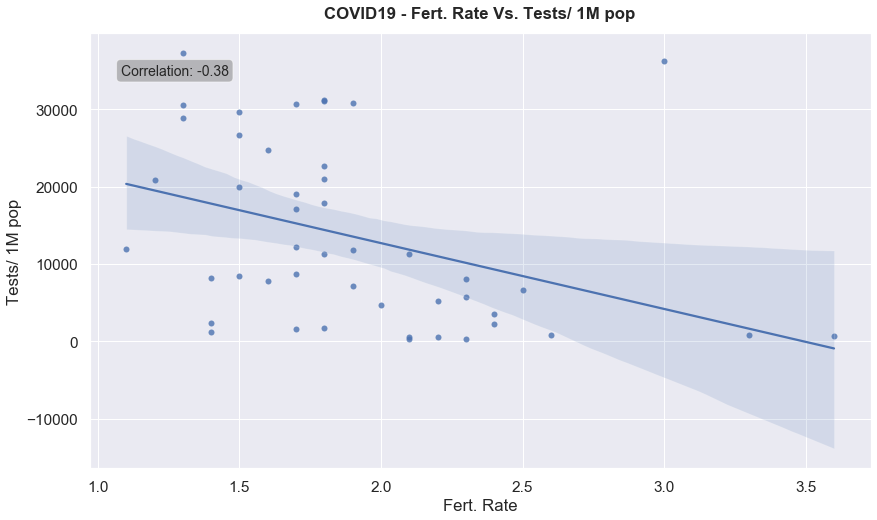

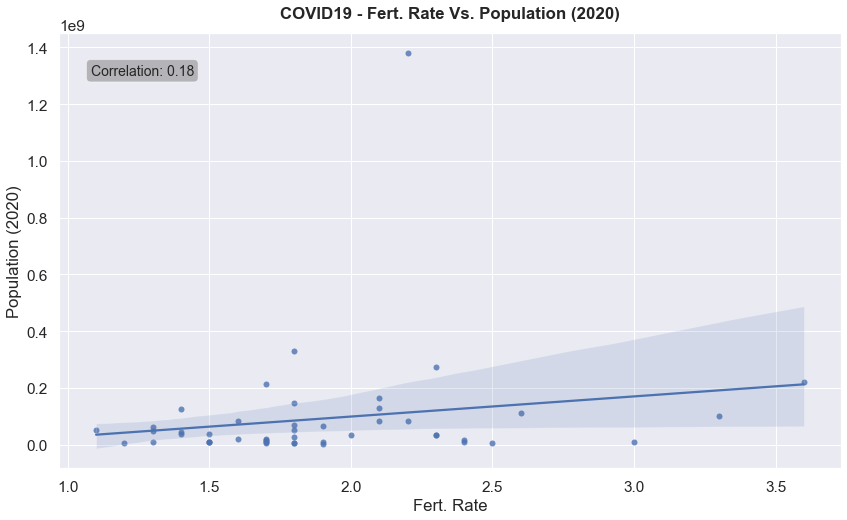

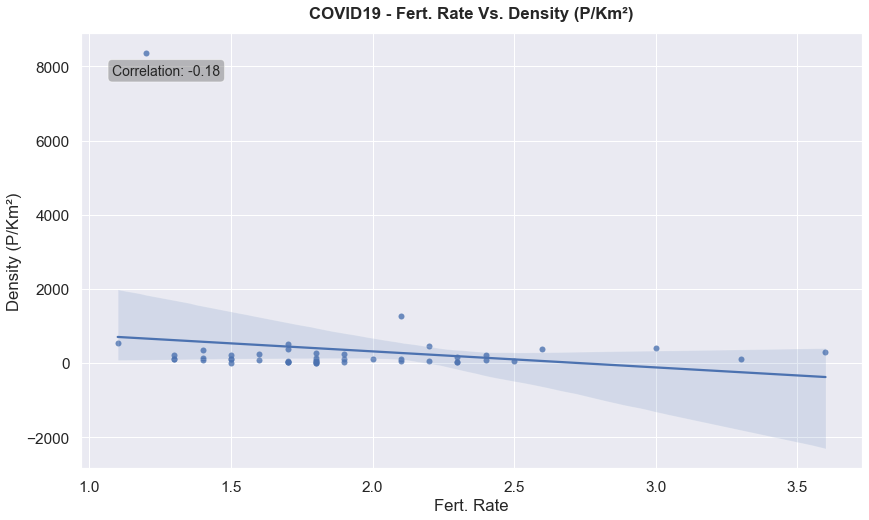

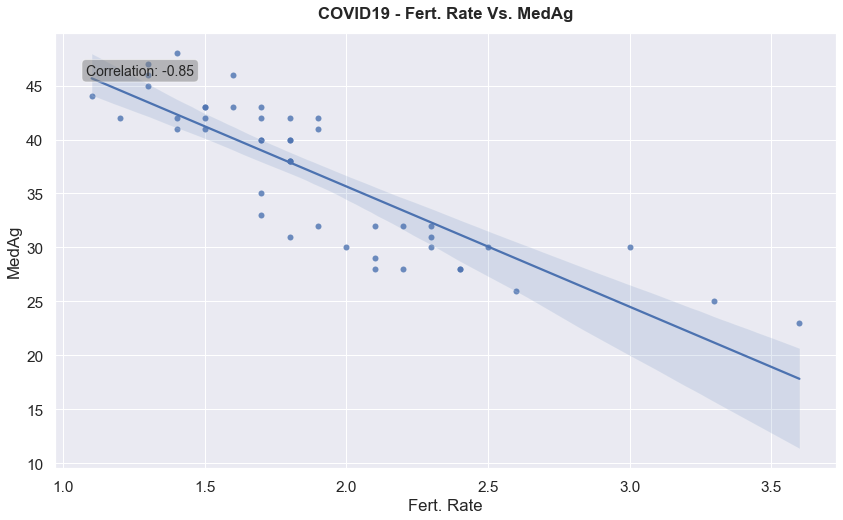

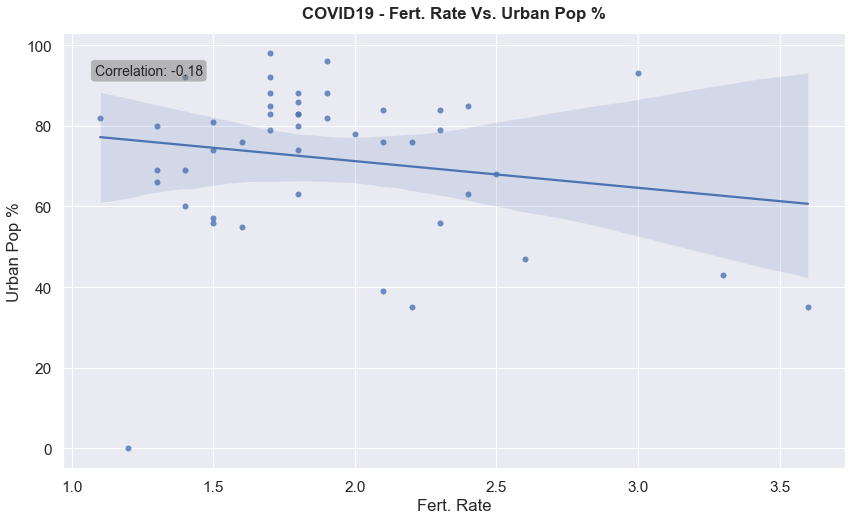

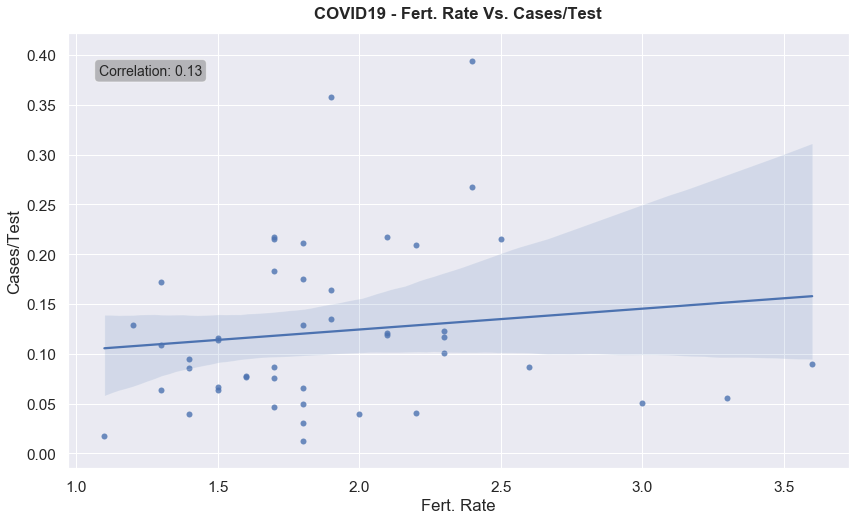

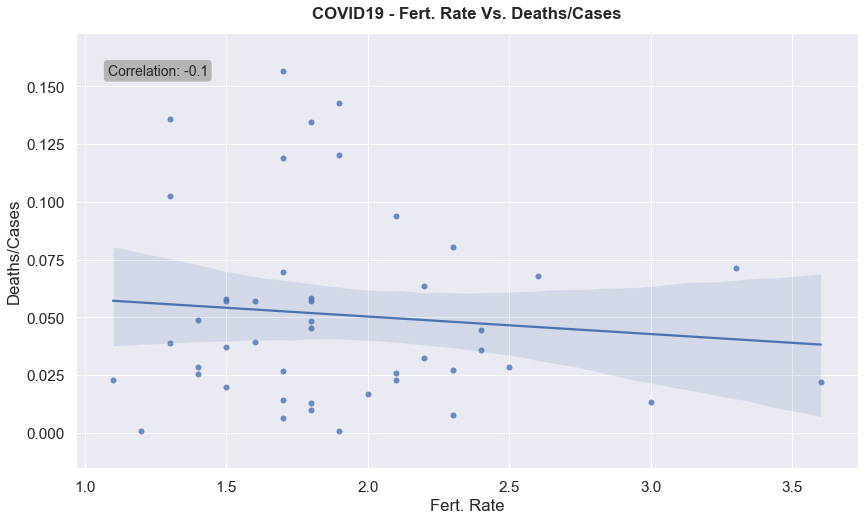

In [122]:
plt.style.use('bmh')
df_age = df[df['TotalCases']>5000].reset_index().sort_values('MedAg', ascending=False)
df_age['Deaths/Cases'] = df_age['TotalDeaths'] / df_age['TotalCases']
list1 = df.columns.to_list()
list1.remove('Fert. Rate')
list1

for i in list1:
    
    fig, ax = plt.subplots(figsize = (14, 8))
    
    corr = df_age['Fert. Rate'].corr(df_age[i]).round(2)
    sns.regplot('Fert. Rate', i, data=df_age);
#   text = [plt.text(x, y, z, color='r', size=15) for x, y, z in zip(df_age['MedAg'],df_age['Tests/ 1M pop'],df_age['Country'])]
    plt.title(f'COVID19 - Fert. Rate Vs. {i}',pad=15,weight = 'semibold')
    sns.set(font_scale=1.4);
    props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
    ax.text(0.04, 0.93, f'Correlation: {corr}', transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props);
    

In [123]:
df[df['TotalCases'] > 50000][['Population (2020)','MedAg']].corr()

,Population (2020),MedAg
Population (2020),1.000000,-0.359631
MedAg,-0.359631,1.000000


In [124]:
# Cheak death rate at top and bottom quantiles (deaths/total cases)
df_topQ_Age = df[df['MedAg'] > df['MedAg'].quantile(0.8)]
df_bottomQ_Age = df[df['MedAg'] < df['MedAg'].quantile(0.2)]

death_rate_top10q_med_age = df_topQ_Age['TotalDeaths'].sum()/df_topQ_Age['TotalCases'].sum() 
death_rate_bottom10q_med_age = df_bottomQ_Age['TotalDeaths'].sum()/df_bottomQ_Age['TotalCases'].sum() 

print(f"Death rate Top 20% median age countries: {round(death_rate_top10q_med_age *100,1)}%")
print(f"Death rate Bottom 20% median age countries: {round(death_rate_bottom10q_med_age *100,1)}%")

Death rate Top 20% median age countries: 9.8%
Death rate Bottom 20% median age countries: 3.3%


In [125]:
df['Tot Cases_1M'].sort_values(ascending=False).head(14)

Country
Luxembourg         5976.0
Iceland            5260.0
Spain              4965.0
Qatar              4138.0
Belgium            4129.0
Ireland            4025.0
Switzerland        3381.0
Italy              3333.0
USA                3129.0
Channel Islands    3048.0
Singapore          2674.0
France             2542.0
Portugal           2385.0
UK                 2374.0
Name: Tot Cases_1M, dtype: float64

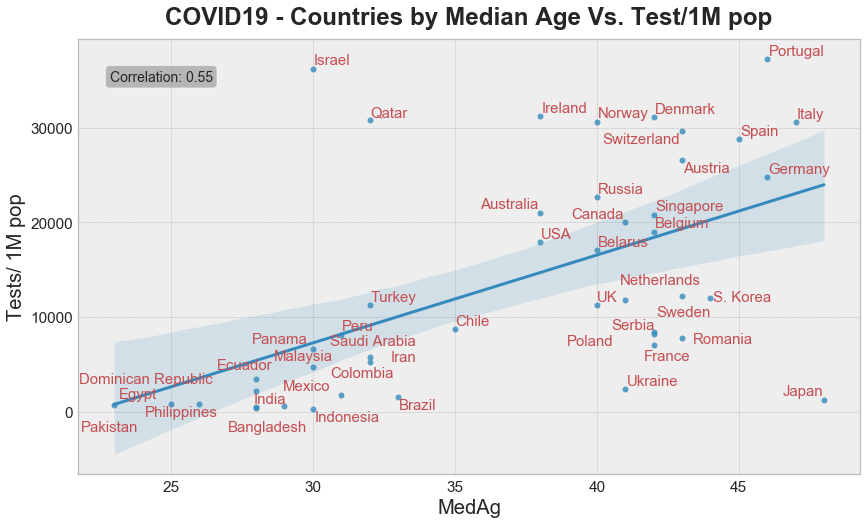

In [126]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize = (14, 8))
df_age = df[df['TotalCases']>5000].reset_index().sort_values('MedAg', ascending=False)
df_age['Deaths/Cases'] = df_age['TotalDeaths'] / df_age['TotalCases']
corr = df_age['MedAg'].corr(df_age['Tests/ 1M pop']).round(2)
sns.regplot('MedAg', 'Tests/ 1M pop', data=df_age, label='Country');
text = [plt.text(x, y, z, color='r', size=15) for x, y, z in zip(df_age['MedAg'],df_age['Tests/ 1M pop'],df_age['Country'])]
plt.title(f'COVID19 - Countries by Median Age Vs. Test/1M pop',pad=15,weight = 'semibold')
sns.set(font_scale=1.4);
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.04, 0.93, f'Correlation: {corr}', transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props);
adjust_text(text);

In [127]:
plt.style.use('fivethirtyeight')

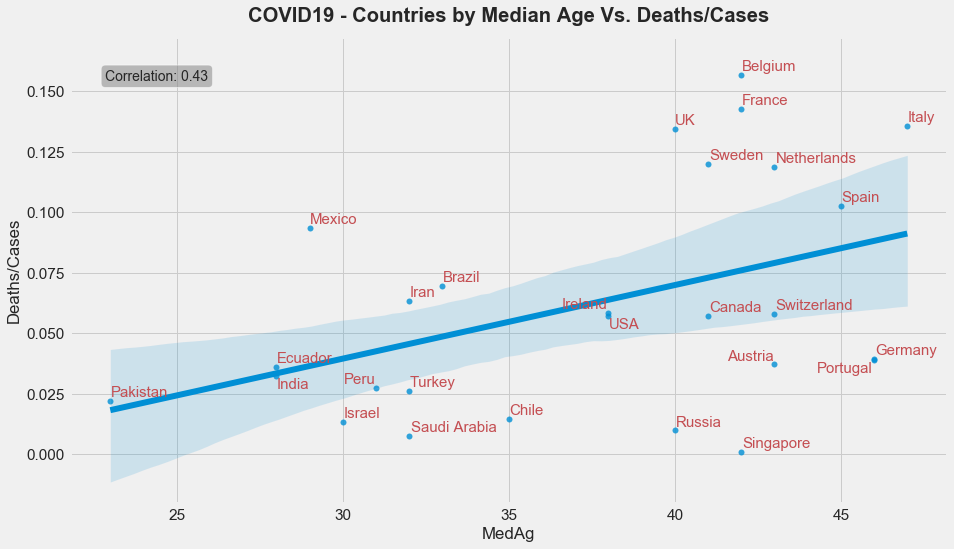

In [128]:
fig, ax = plt.subplots(figsize = (14, 8))
df_age = df[df['TotalCases']>14000].reset_index().sort_values('MedAg', ascending=False)
df_age['Deaths/Cases'] = df_age['TotalDeaths'] / df_age['TotalCases']
corr = df_age['MedAg'].corr(df_age['Deaths/Cases']).round(2)
sns.regplot('MedAg', 'Deaths/Cases', data=df_age, label='Country');
text = [plt.text(x, y, z, color='r', size=15) for x, y, z in zip(df_age['MedAg'],df_age['Deaths/Cases'],df_age['Country'])]
plt.title(f'COVID19 - Countries by Median Age Vs. Deaths/Cases',pad=15,weight = 'semibold')
sns.set(font_scale=1.4);
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.04, 0.93, f'Correlation: {corr}', transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props);
adjust_text(text);


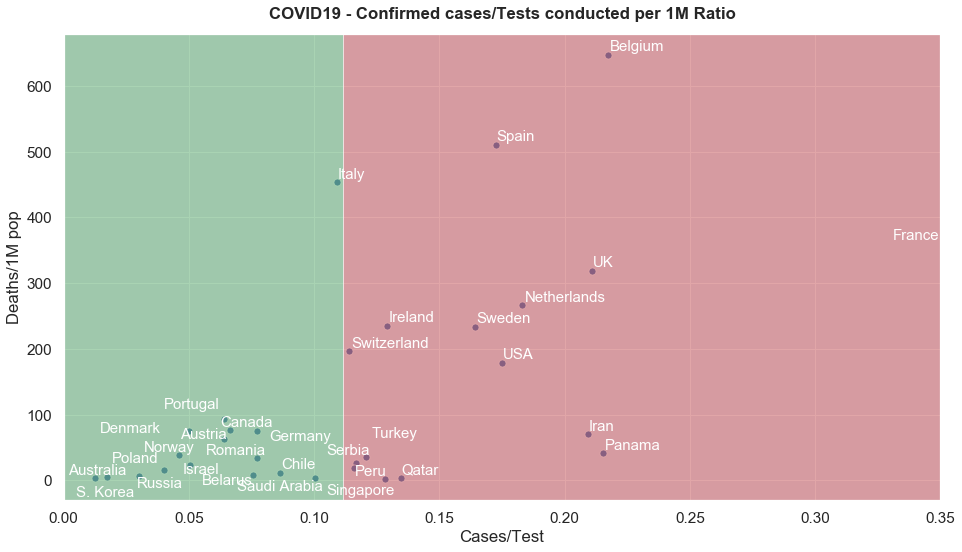

In [129]:
df_ir = df[(df['Tests/ 1M pop'] > 5000) & (df['TotalCases']>5000)].reset_index()
median_ir = df_ir['Cases/Test'].median()
fig, ax = plt.subplots(figsize = (14, 8))
sns.scatterplot(x='Cases/Test', y='Deaths/1M pop', data=df_ir, s=50);
text = [plt.text(x, y, z, color='w', size=15) for x, y, z in zip(df_ir['Cases/Test'],df_ir['Deaths/1M pop'],df_ir['Country'])]
plt.title(f'COVID19 - Confirmed cases/Tests conducted per 1M Ratio',pad=15,weight = 'semibold')
ax.set(xlim=(0,0.35));
plt.axvspan(0, median_ir, facecolor='g', alpha=0.5)
plt.axvspan(median_ir, 0.35, facecolor='r', alpha=0.5)
adjust_text(text);



In [130]:
median_ir

0.11159605270561768

In [131]:
pd.set_option('display.max_columns', 500)

In [132]:
df_ir.columns

Index(['Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'TotalRecovered',
       'ActiveCases', 'Serious', 'Tot Cases_1M', 'Deaths/1M pop', 'TotalTests',
       'Tests/ 1M pop', 'Population (2020)', 'Density (P/Km²)', 'Fert. Rate',
       'MedAg', 'Urban Pop %', 'Cases/Test', 'Deaths/Cases'],
      dtype='object')

In [133]:
df_ir['Tests/ 1M pop'].median()

18442.5

In [134]:
df_ir['recoverd\cases'] = df_ir['TotalRecovered'] / (df_ir['TotalCases'] - df_ir['TotalDeaths'])

In [135]:
df_ir[['Country','recoverd\\cases']].sort_values(by='recoverd\\cases')

,Country,recoverd\cases
4,UK,0.000000
11,Netherlands,0.000000
29,Norway,0.004293
17,Sweden,0.058207
14,Portugal,0.059425
19,Singapore,0.072183
31,Panama,0.080345
24,Qatar,0.095206
7,Russia,0.104504
15,Saudi Arabia,0.139724


In [136]:
df_ir['Cases_tests_recoverd_retio'] = df_ir['recoverd\cases'] * df_ir['Cases/Test']

In [137]:
df_ir[['Country','Cases_tests_recoverd_retio']]

,Country,Cases_tests_recoverd_retio
0,USA,0.025486
1,Spain,0.102614
2,Italy,0.043192
3,France,0.117940
4,UK,0.000000
5,Germany,0.060477
6,Turkey,0.042030
7,Russia,0.003144
8,Iran,0.174764
9,Canada,0.026965


In [138]:
# df_ir['MedAgeG'] = pd.qcut(df_ir['MedAg'],7, precision=0)

In [139]:
df_ir = df_ir.sort_values(by='Cases/Test')

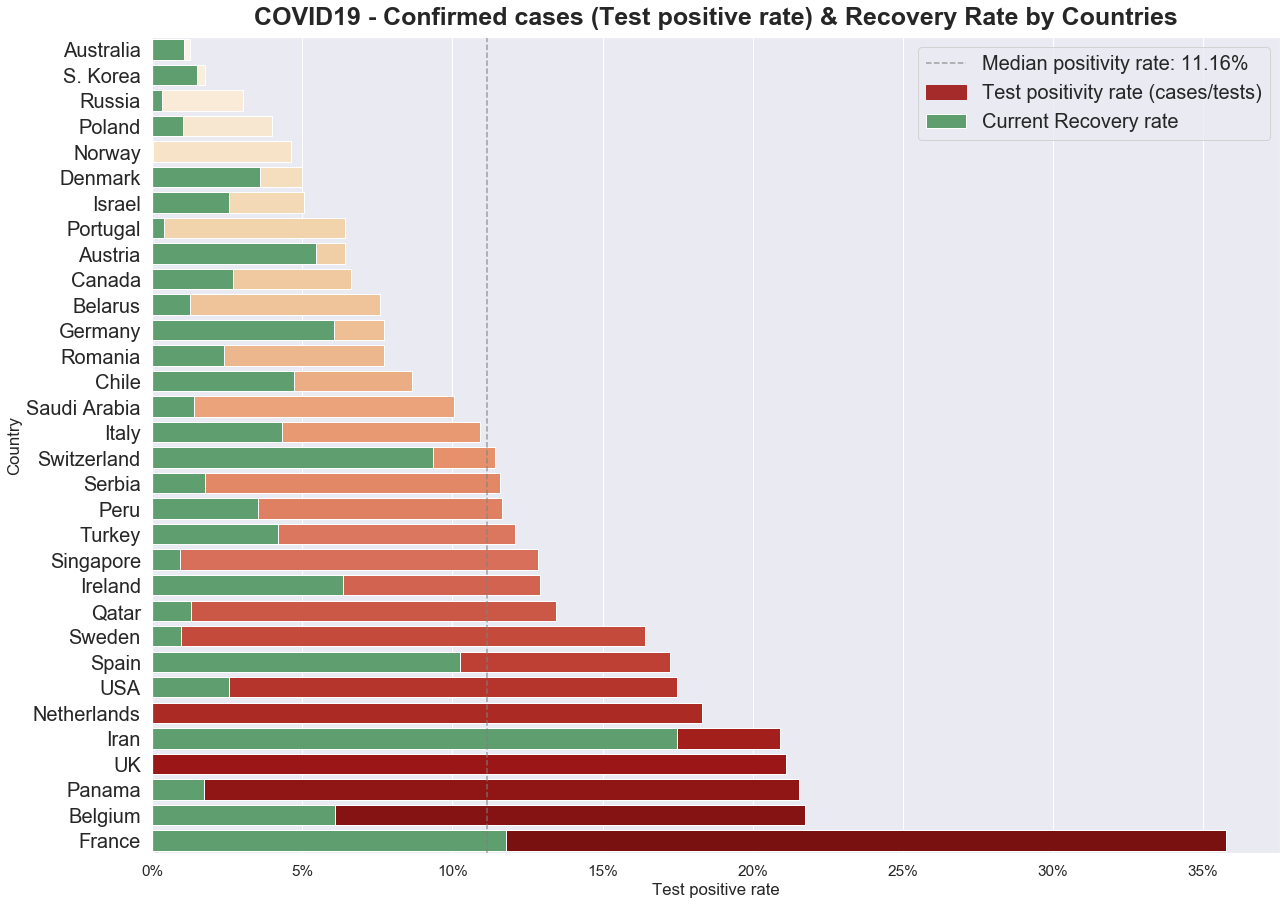

In [140]:
fig, ax = plt.subplots(figsize = (18, 14))
ax = sns.barplot(x= "Cases/Test", y = "Country", data = df_ir, palette=("OrRd"), label='Test positivity rate (cases/tests)')
ax2 = sns.barplot(x= "Cases_tests_recoverd_retio", y = "Country", data = df_ir, color='g', label='Current Recovery rate')
plt.title(f'COVID19 - Confirmed cases (Test positive rate) & Recovery Rate by Countries',fontsize=25,pad=12,weight ='semibold')
ax3 = plt.axvline(median_ir, linestyle='--', c='grey', alpha=0.7, label=f'Median positivity rate: {np.round(median_ir*100,2)}%')
plt.gca().legend(prop={'size': 20})
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
plt.yticks(fontsize=20); plt.xlabel('Test positive rate')
leg = ax.get_legend()
leg.legendHandles[1].set_color('brown'); sns.set_context("poster");

# U.S. states

<img src="us_states.png">

In [141]:
usa_covid19.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-28,AK,351.0,16738.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,228.0,6d6333484b758bb236b3f2fa9857f40c52a59d0a,2020-04-28T20:00:00Z,9.0,NaN,17089.0,17089.0,17089.0,2,0.0,0.0,827.0,6.0,833.0
1,2020-04-28,AL,6687.0,69140.0,NaN,NaN,911.0,NaN,335.0,NaN,195.0,NaN,ba9dbab92f047c4b4b3e3857de416e7cb174b05e,2020-04-28T20:00:00Z,242.0,911.0,75827.0,75827.0,75827.0,1,20.0,39.0,1642.0,188.0,1830.0
2,2020-04-28,AR,3111.0,37560.0,NaN,104.0,NaN,NaN,NaN,20.0,NaN,1146.0,6310b3c9131a8d988038f31a216d268bce711cb5,2020-04-28T20:00:00Z,52.0,NaN,40671.0,40671.0,40671.0,5,2.0,0.0,120.0,94.0,214.0
3,2020-04-28,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cb1dd833c2e825a207b819e419821f0f66cf61ed,2020-04-28T20:00:00Z,0.0,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,2020-04-28,AZ,6948.0,60490.0,NaN,737.0,1095.0,303.0,NaN,193.0,NaN,1450.0,794b840cd5db415c34fde311f79479b9e3b3df36,2020-04-28T20:00:00Z,293.0,1095.0,67438.0,67438.0,67438.0,4,18.0,44.0,663.0,232.0,895.0


In [142]:
usa_covid19.columns.tolist()

['date',
 'state',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'recovered',
 'hash',
 'dateChecked',
 'death',
 'hospitalized',
 'total',
 'totalTestResults',
 'posNeg',
 'fips',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease']

In [143]:
# USA positive
usa_covid19.groupby('state')['positive'].first().sum()

1005592.0

In [144]:
# USA test positive rate
(usa_covid19.groupby('state')['positive'].first().sum())/(usa_covid19.groupby('state')['totalTestResults'].first().sum())

0.17350572697683536

In [145]:
# USA recovered
usa_covid19.groupby('state')['recovered'].first().sum()

139357.0

In [146]:
# USA recovered percentage
(usa_covid19.groupby('state')['recovered'].first().sum()) / (usa_covid19.groupby('state')['positive'].first().sum())

0.13858204918097997

In [147]:
# USA deaths
usa_covid19.groupby('state')['death'].first().sum()

52525.0

In [148]:
# USA deaths percentage
(usa_covid19.groupby('state')['death'].first().sum()) / (usa_covid19.groupby('state')['positive'].first().sum())

0.0522329135474427

In [149]:
# States symbols
usa_covid19['state'].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [150]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


In [151]:
# Converting US state names
usa_covid19['state'] = usa_covid19['state'].map(states)

In [152]:
usa_t5 = pd.DataFrame(usa_covid19[usa_covid19['date'] > '2020-03-01'].pivot_table(index='date',values='positive',
          columns=['state'])[-1:].T).nlargest(5,usa_covid19.date[1])
# usa_t10.index = usa_t10.index.map(states)
usa_t5.columns=['TotalCases']
usa_t5

,TotalCases
state,
New York,295106.0
New Jersey,113856.0
Massachusetts,58302.0
Illinois,48102.0
California,45031.0


In [153]:
usa_t5.index.tolist()

['New York', 'New Jersey', 'Massachusetts', 'Illinois', 'California']

In [154]:
plt.style.use('default')


In [155]:
test = usa_covid19[(usa_covid19['date'] > '2020-03-01') & (usa_covid19['state'].isin(usa_t5.index.tolist()))].pivot_table\
            (index='date',values='positive', columns='state')

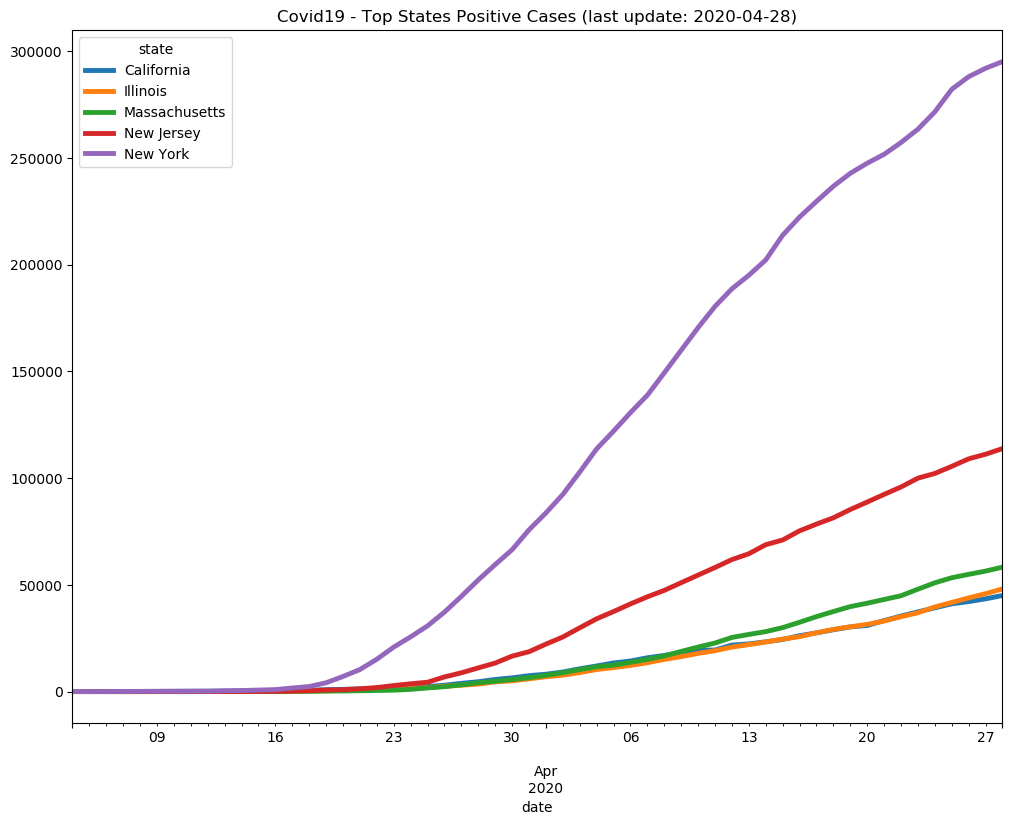

In [156]:
usa_covid19[(usa_covid19['date'] > '2020-03-01') & (usa_covid19['state'].isin(usa_t5.index.tolist()))].pivot_table\
            (index='date',values='positive', columns='state').plot(figsize=(12,9),lw=3.5,
             title=f'Covid19 - Top States Positive Cases (last update: {usa_covid19.date[0].date()})');

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 


In [157]:
usa_covid19[usa_covid19['state'] =='New York'].head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
37,2020-04-28,New York,295106.0,549888.0,NaN,12645.0,64318.0,NaN,NaN,NaN,NaN,51673.0,4577e5826cad0945fd2dbf7648519b073d5e7ea9,2020-04-28T20:00:00Z,17638.0,64318.0,844994.0,844994.0,844994.0,36,335.0,748.0,15789.0,3110.0,18899.0
93,2020-04-27,New York,291996.0,534099.0,NaN,12819.0,63570.0,NaN,NaN,NaN,NaN,50751.0,5b2a7aef7d4c8ab462441ae36d996688ccaf8eec,2020-04-27T20:00:00Z,17303.0,63570.0,826095.0,826095.0,826095.0,36,337.0,1044.0,16794.0,3951.0,20745.0
149,2020-04-26,New York,288045.0,517305.0,NaN,12839.0,62526.0,5016.0,NaN,NaN,NaN,49687.0,2a47d3ac63566fd5b660a9c957c8cfb0ca6bbddf,2020-04-26T20:00:00Z,16966.0,62526.0,805350.0,805350.0,805350.0,36,367.0,1067.0,21880.0,5902.0,27782.0
205,2020-04-25,New York,282143.0,495425.0,NaN,13524.0,61459.0,5016.0,NaN,NaN,NaN,47935.0,c826721681bdab8a913804e48543e01efaba28a6,2020-04-25T20:00:00Z,16599.0,61459.0,777568.0,777568.0,777568.0,36,437.0,1045.0,36359.0,10553.0,46912.0
261,2020-04-24,New York,271590.0,459066.0,NaN,14258.0,60414.0,5016.0,NaN,NaN,NaN,46156.0,8c8b938ac222cb1c860ab74555d0d6e0710763c6,2020-04-24T20:00:00Z,16162.0,60414.0,730656.0,730656.0,730656.0,36,422.0,1149.0,26606.0,8130.0,34736.0


In [158]:
ny_reults =usa_covid19[usa_covid19['state'] =='Illinois'][['date','positiveIncrease','totalTestResultsIncrease']]\
.sort_values(by='date').reset_index(drop=True).dropna() 

In [159]:
ny_reults['test positive rate'] = ny_reults['positiveIncrease'] / ny_reults['totalTestResultsIncrease']
ny_reults['test positive rate'].dropna(inplace=True)
ny_reults = ny_reults[ny_reults['date'] > '2020-03-17']
ny_reults['MA'] = ny_reults['test positive rate'].expanding(2).mean().shift(1)

In [160]:
ny_reults.head()

,date,positiveIncrease,totalTestResultsIncrease,test positive rate,MA
14,2020-03-18,129.0,552.0,0.233696,NaN
15,2020-03-19,134.0,1096.0,0.122263,NaN
16,2020-03-20,163.0,1134.0,0.143739,0.177979
17,2020-03-21,168.0,1960.0,0.085714,0.166566
18,2020-03-22,296.0,2079.0,0.142376,0.146353


In [161]:
plt.style.use('seaborn-bright')

In [162]:
def test_positive_rate_plot(df, state):
    
    
    results = df[df['state'] == state][['date','positiveIncrease','totalTestResultsIncrease']]\
                 .sort_values(by='date').reset_index(drop=True).dropna() 
    results['test positive rate'] = results['positiveIncrease'] / results['totalTestResultsIncrease']
    results['test positive rate'].dropna(inplace=True)
    results = results[results['date'] > '2020-03-17']
    results['MA'] = results['test positive rate'].expanding(2).mean().shift(1)
    

    plt.style.use('seaborn-paper')
    fig, ax = plt.subplots(figsize=(10,6))
    ax.grid(False)
    plt.plot(results['date'], results['test positive rate'], marker='.', markersize=15, lw=3);
    plt.plot(results['date'], results['MA'], color='r', lw=3.5);
    plt.xticks(fontsize=15,rotation=45);
    plt.yticks(size=15)
    plt.xlim(results['date'].min().date(),results['date'].max().date()+ datetime.timedelta(2))
    plt.title(f'COVID19 - Test Positive Rate in {state}', fontsize=20,pad=15,weight ='semibold')
    ax.set_ylabel('Daily test Positive Ratio', fontsize=16, size=20)
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    plt.text(results['date'].max().date() -datetime.timedelta(1),(results['test positive rate'].iloc[-1])*1.1,\
         f"{(results['test positive rate'].iloc[-1]*100).round(1)}%", color='blue', size=15)
    plt.text(results['date'].max().date()-datetime.timedelta(1),(results['MA'].iloc[-1])*1.1,\
         f"{(results['MA'].iloc[-1]*100).round(1)}%", color='red', size=15)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.legend(['test positive ratio','expanding mean'],prop={'size': 15}, loc='best');



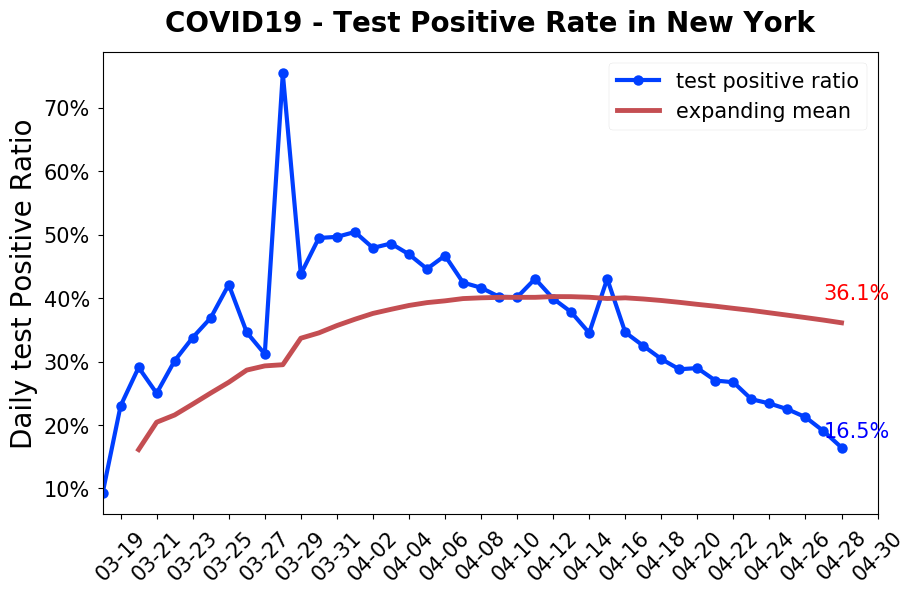

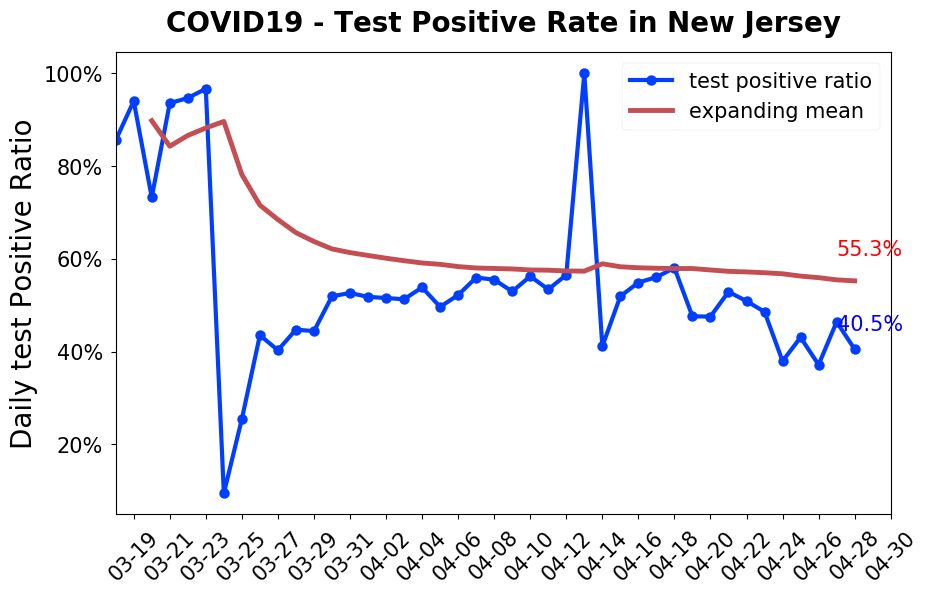

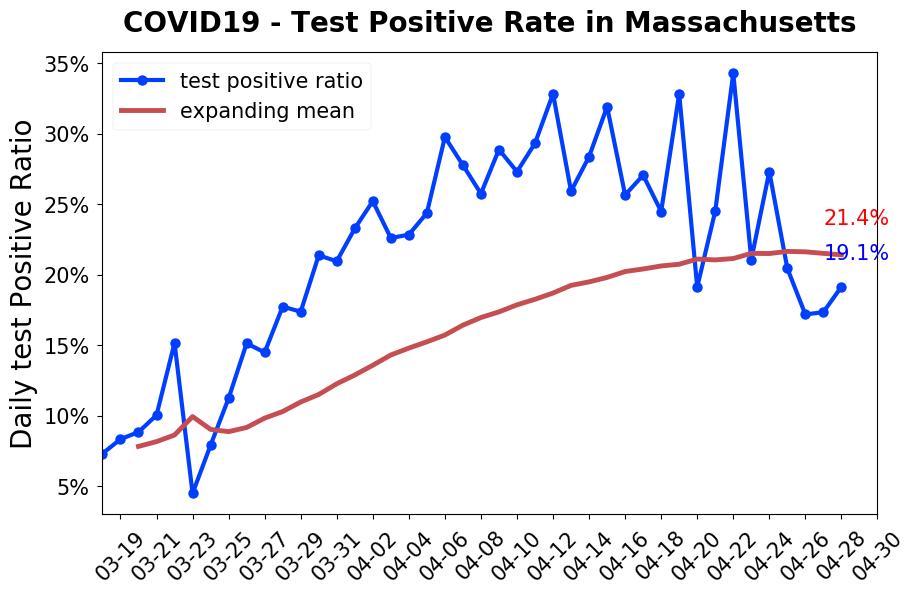

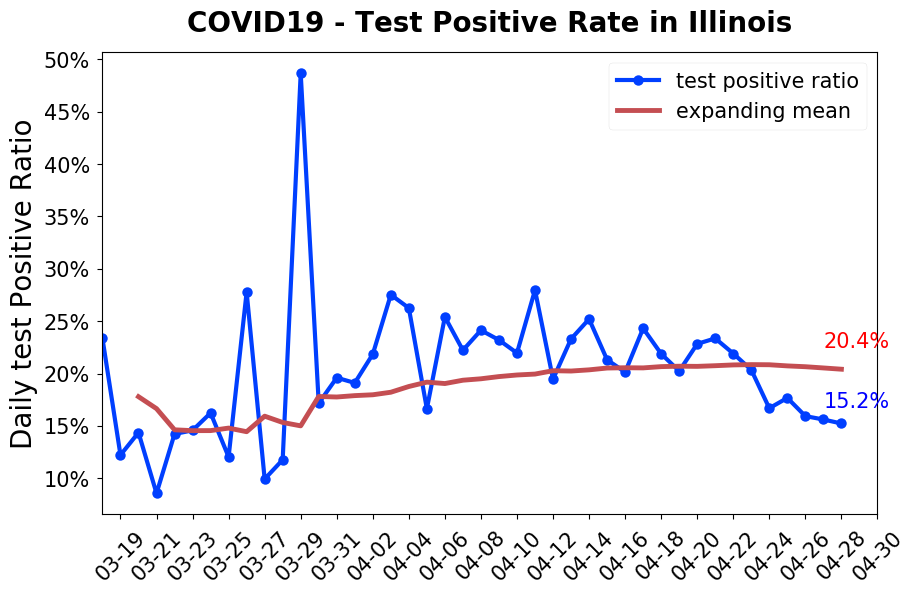

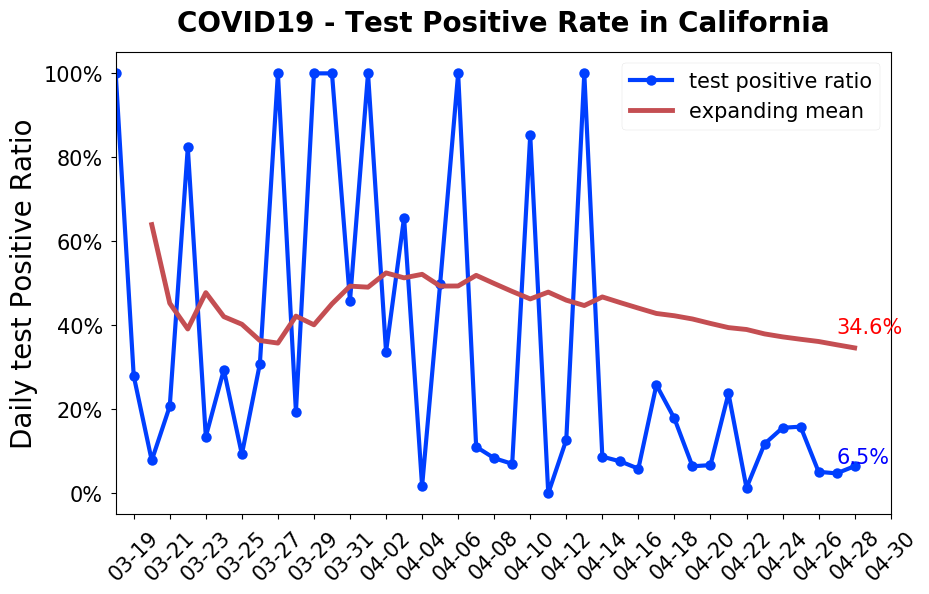

In [163]:
for state in usa_t5.index:
    
    test_positive_rate_plot(usa_covid19,state)

In [164]:
ny = usa_covid19[usa_covid19['state'] =='New York'][['date','positiveIncrease','deathIncrease']].sort_values(by='date')\
.reset_index(drop=True)\
.dropna()

In [165]:
ny['total_cases'] = ny['positiveIncrease'].cumsum()

In [166]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1 to 55
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              55 non-null     datetime64[ns]
 1   positiveIncrease  55 non-null     float64       
 2   deathIncrease     55 non-null     float64       
 3   total_cases       55 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.1 KB


In [167]:
plt.style.use('seaborn-deep')

In [168]:
def positive_cases_plot(df,state):
    
    state_c = df[df['state'] ==state][['date','positiveIncrease','deathIncrease']].sort_values(by='date')\
    .reset_index(drop=True).dropna()
    state_c['total_cases'] = state_c['positiveIncrease'].cumsum()
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize=(16,5))
    plt.bar(state_c['date'], height=state_c['positiveIncrease'], width=0.9,alpha=0.9);
    plt.xlim(state_c['date'].min().date(),state_c['date'].max().date() + datetime.timedelta(2))
    plt.xticks(fontsize=17,rotation=45);
    plt.yticks(color='blue', size=20)
    plt.margins(x=0.04)
    plt.title(f'COVID19 - Cases in {state}', fontsize=25,pad=15,weight ='semibold')
    ax.set_ylabel('Daily Positive Increase', fontsize=16, color='blue', size=20,rotation=360)
    ax.yaxis.set_label_coords(-0.05,1.04)
    ax.grid(False)


    ax2 = ax.twinx()
    plt.plot(state_c['date'],state_c['total_cases'], lw=3.5, color='r', marker='.', markersize=20)
    plt.yticks(color='red', size=20); ax2.grid(False)
    plt.ylim(0,(state_c['total_cases'].max()*1.2))
    ax2.set_ylabel('Total Positive Cases', fontsize=16, color='red', size=20, rotation=360, labelpad=35)
    ax2.yaxis.set_label_coords(+1.05,1.1)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

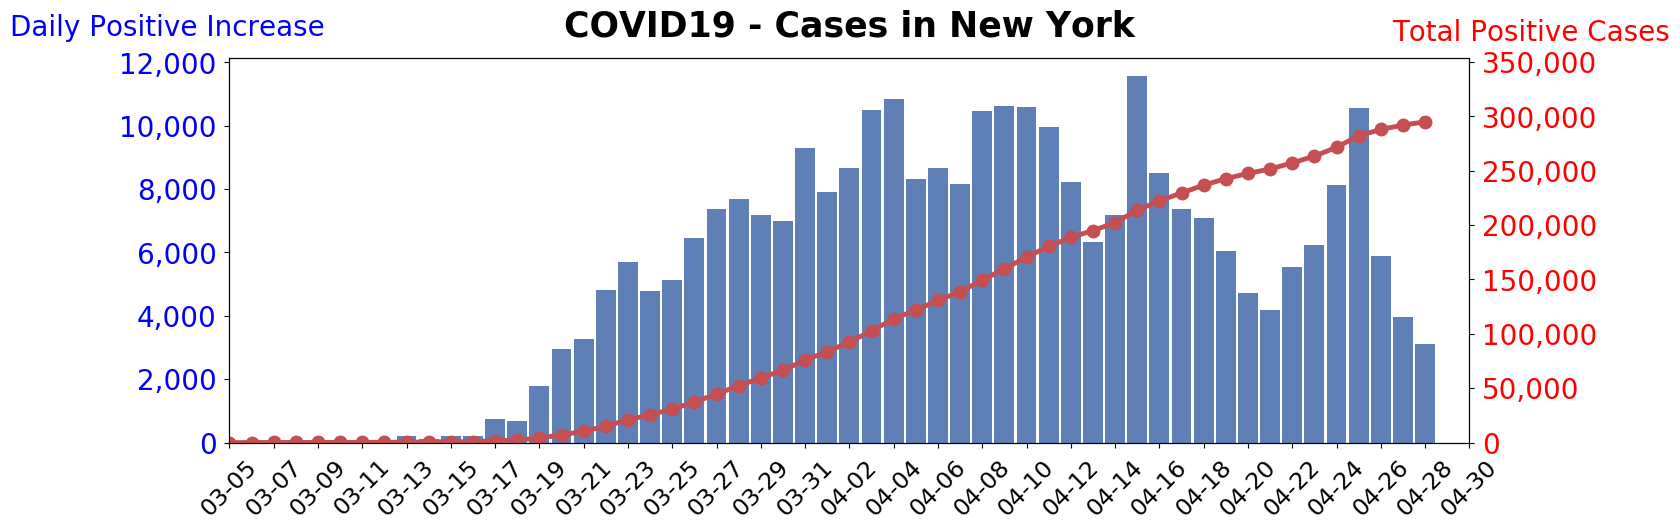

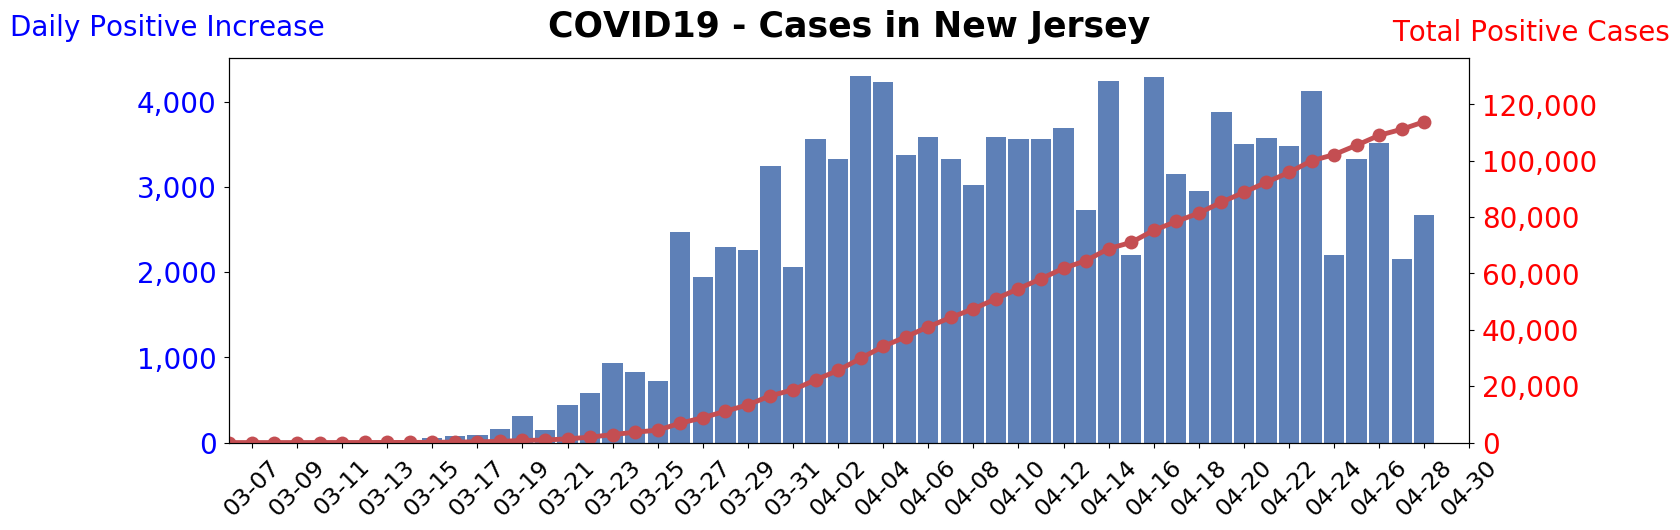

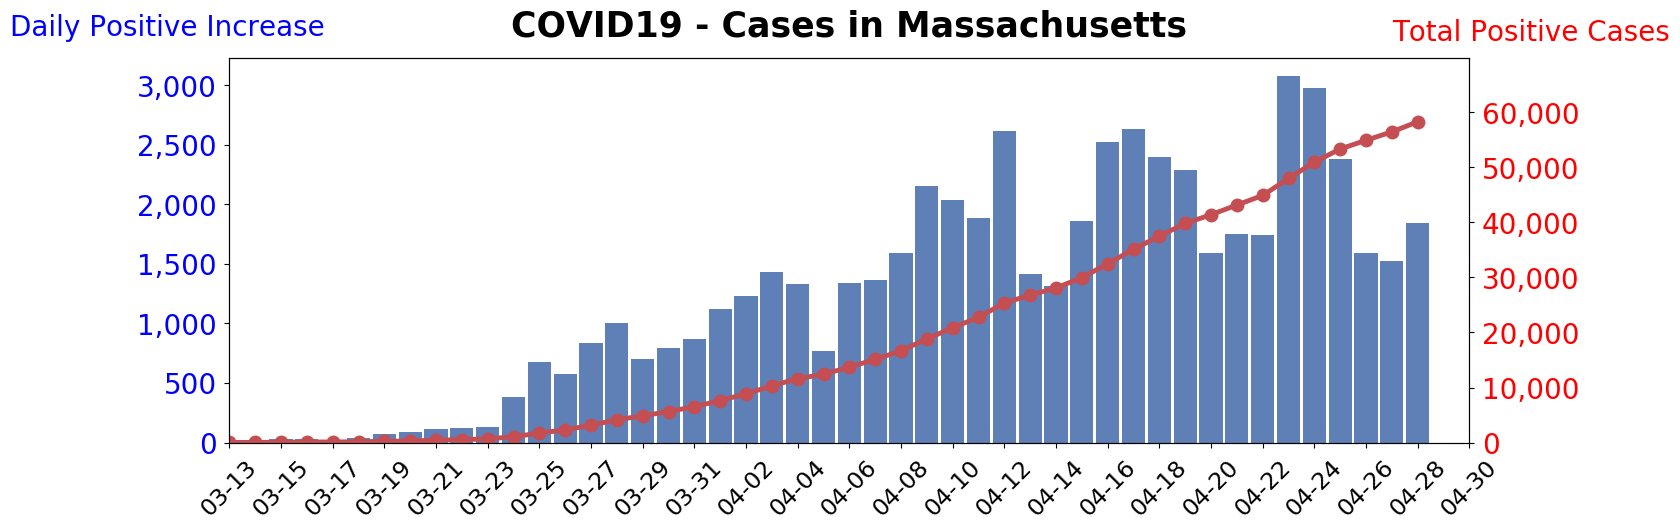

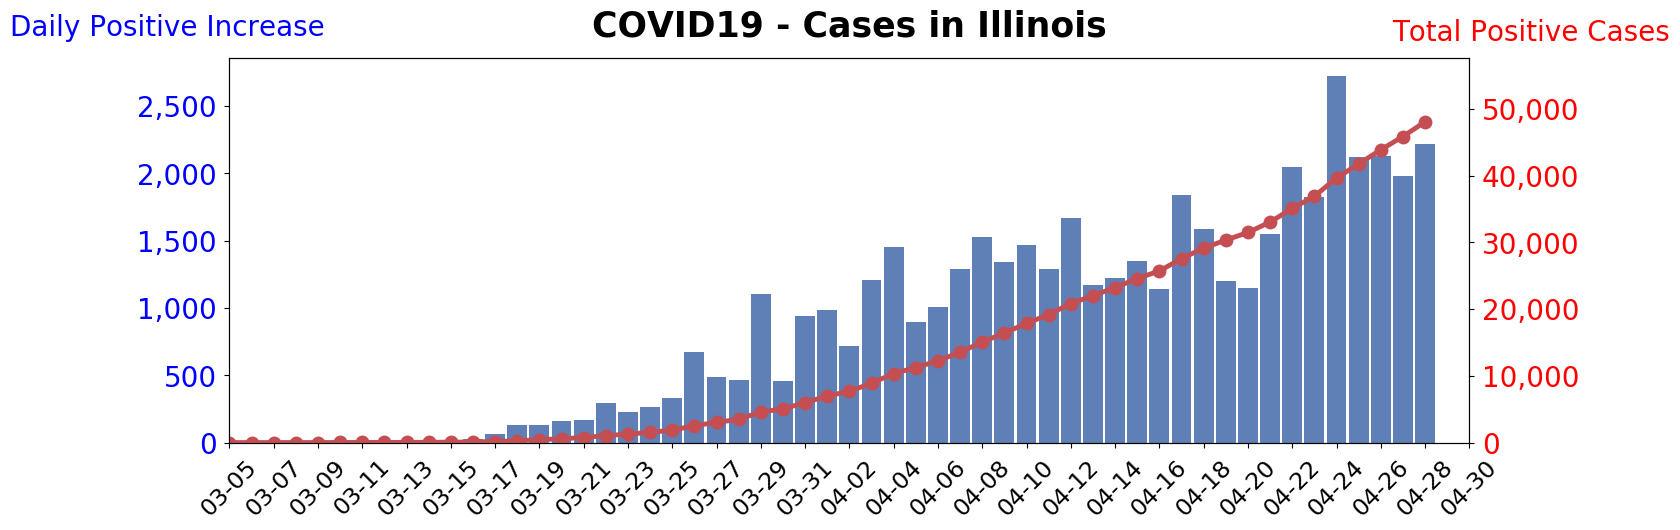

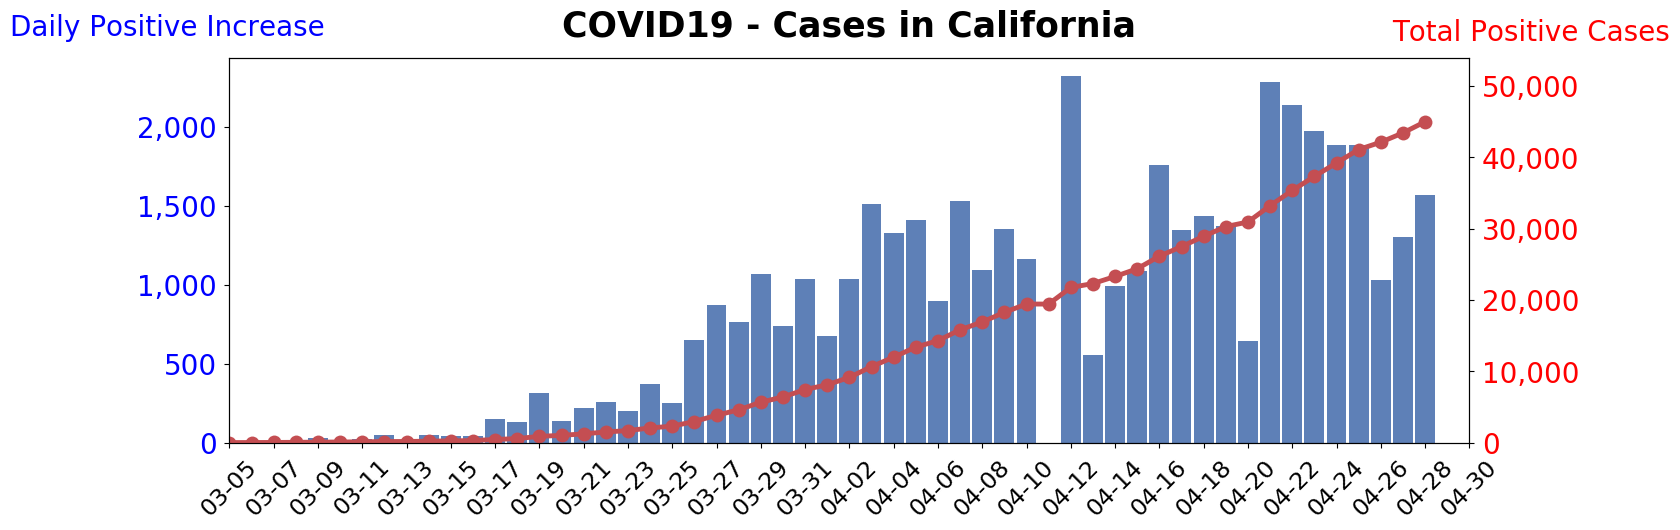

In [169]:
for state in usa_t5.index:
    
    positive_cases_plot(usa_covid19,state)

In [170]:
def positive_cases_plot(df,state):
    
    state_c = df[df['state'] ==state][['date','positiveIncrease','deathIncrease']].sort_values(by='date')\
    .reset_index(drop=True).dropna()
    state_c['total_cases'] = state_c['positiveIncrease'].cumsum()
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(figsize=(16,5))
    plt.bar(state_c['date'], height=state_c['positiveIncrease'], width=0.9);
    plt.xlim(state_c['date'].min().date(),state_c['date'].max().date() + datetime.timedelta(2))
    plt.xticks(fontsize=17,rotation=45);
    plt.yticks(color='blue', size=20)
    plt.margins(x=0.04)
    plt.title(f'COVID19 - Cases in {state}', fontsize=20,pad=12,weight ='semibold')
    ax.set_ylabel('Positive Increase', fontsize=16, color='blue', size=25)

    ax2 = ax.twinx()
    plt.plot(state_c['date'],state_c['total_cases'], lw=3.5, color='r', marker='.', markersize=20)
    plt.yticks(color='red', size=20)
    plt.ylim(0,(state_c['total_cases'].max()*1.2))
    ax2.set_ylabel('Total Positive Cases', fontsize=16, color='red', size=25, rotation=270, labelpad=35)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

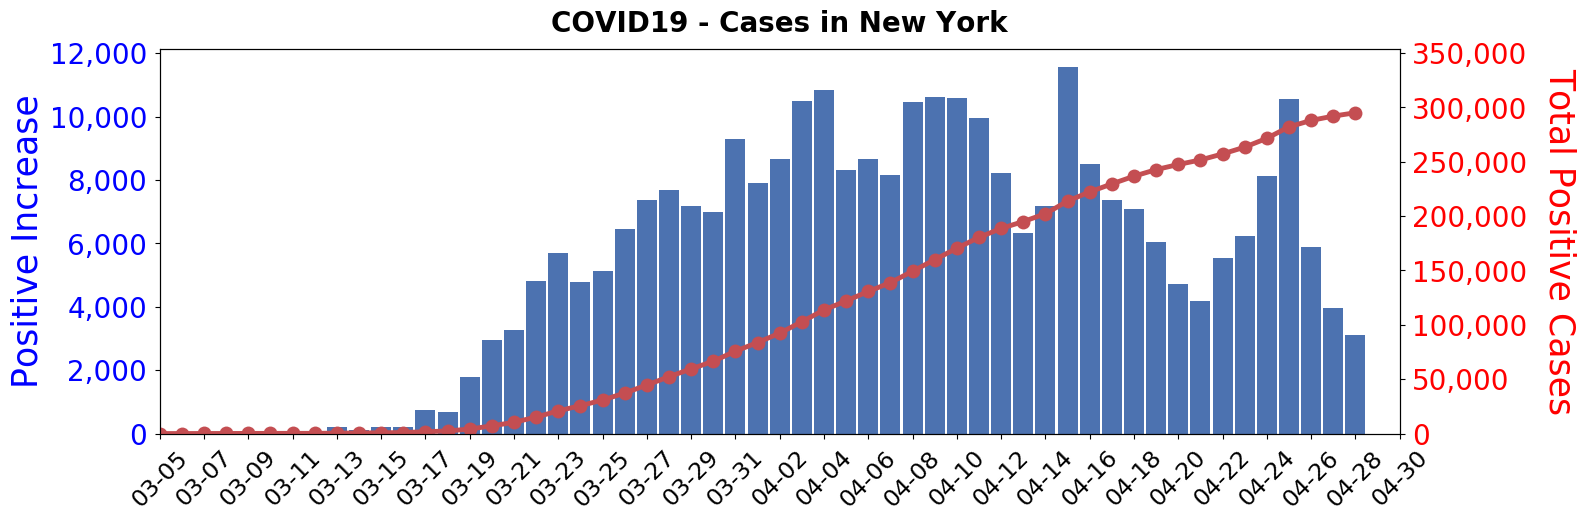

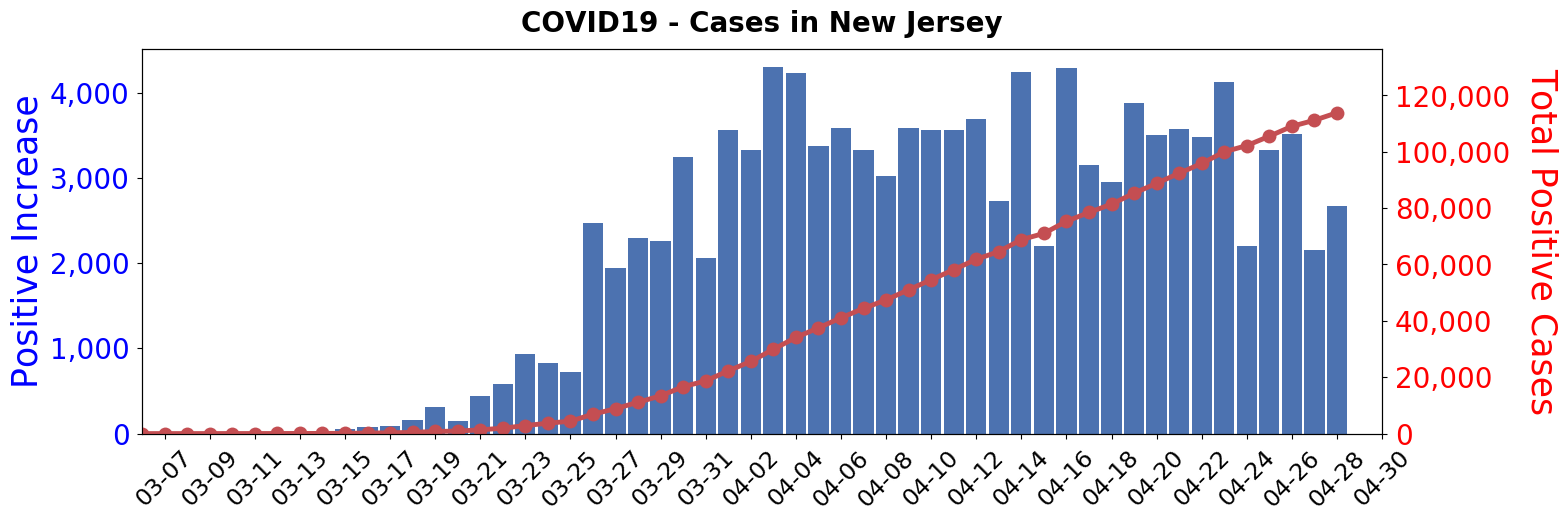

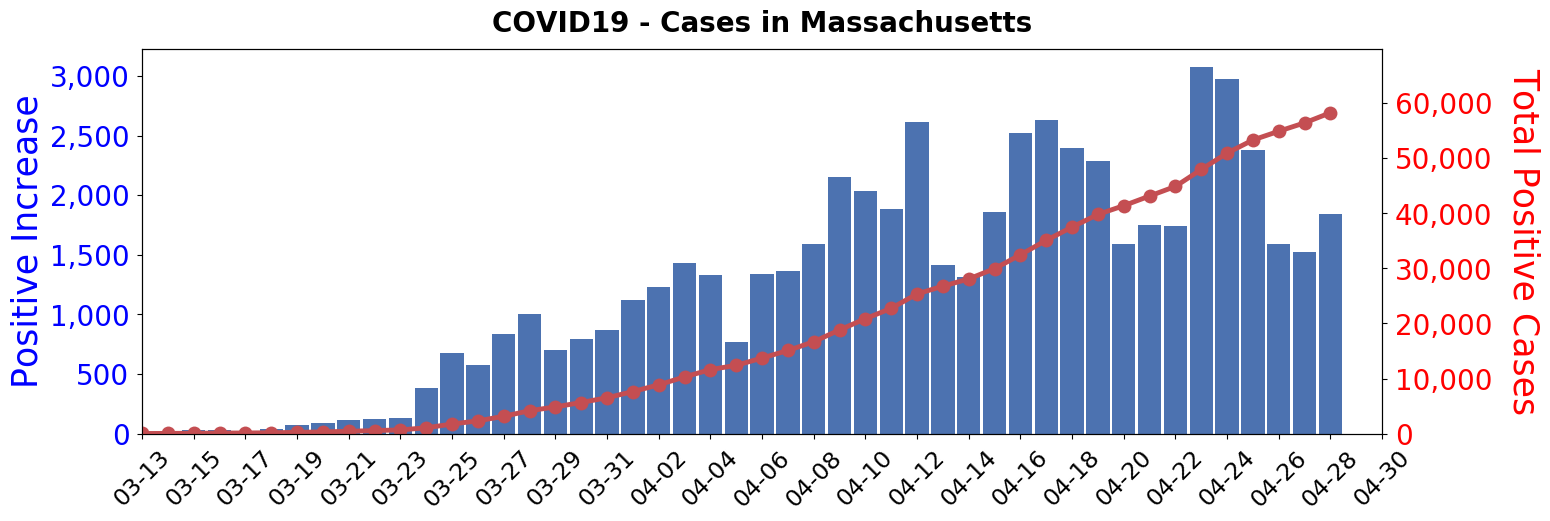

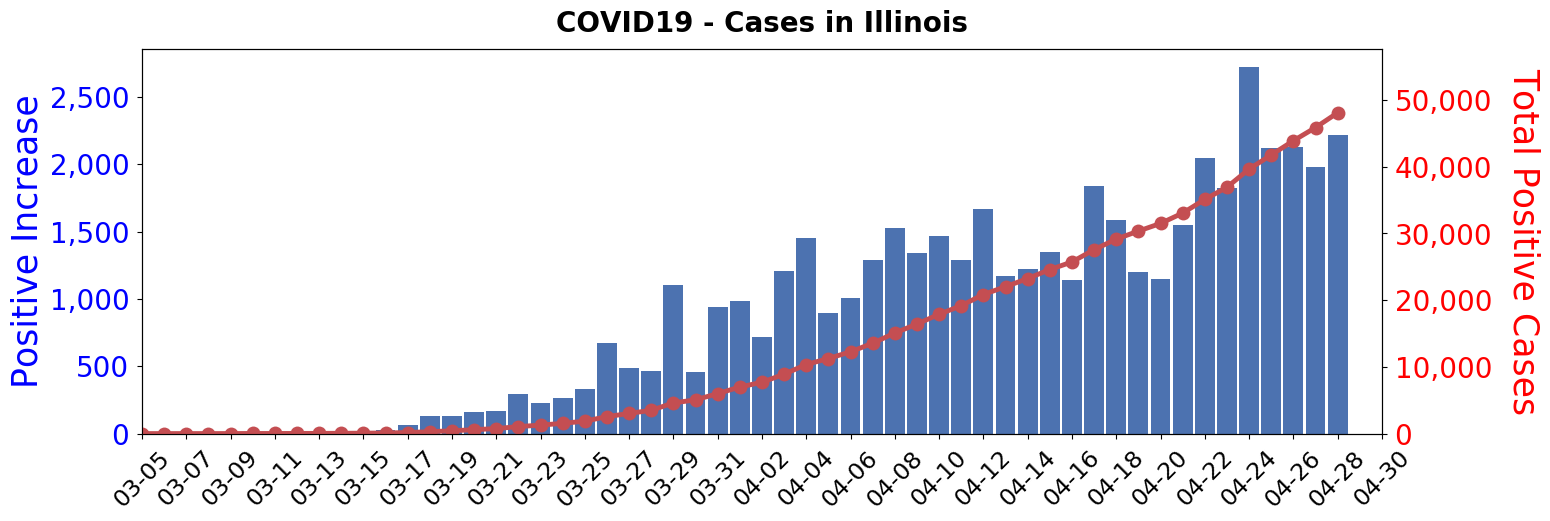

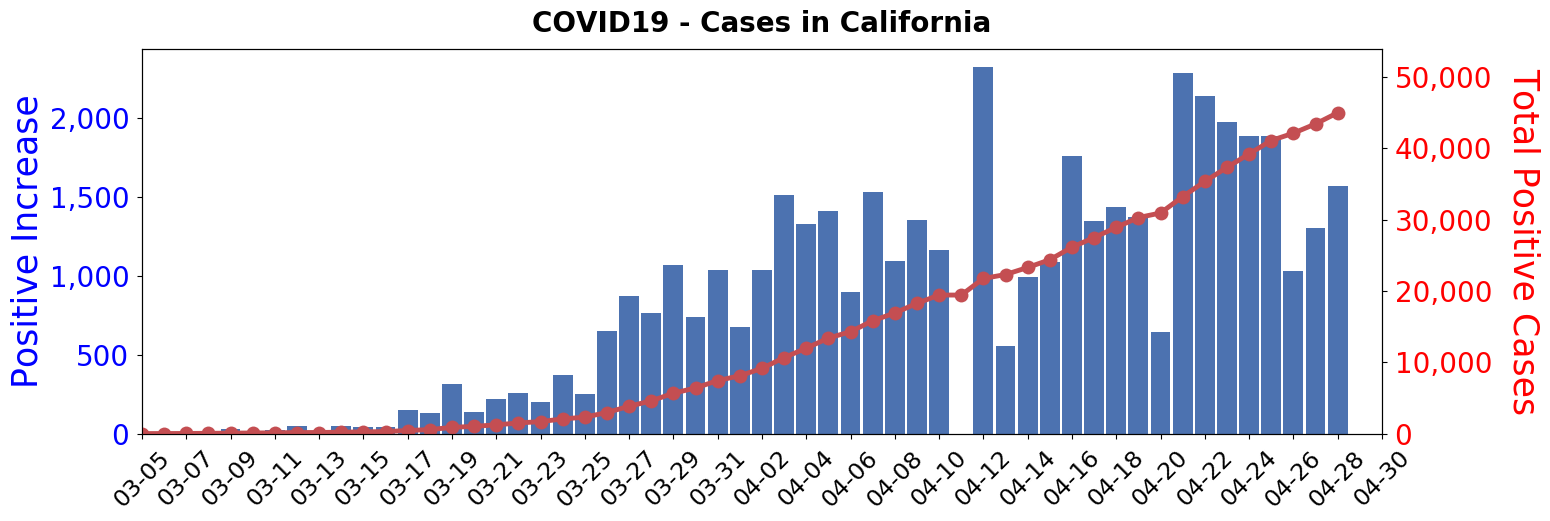

In [171]:
for state in usa_t5.index:
    
    positive_cases_plot(usa_covid19,state)

In [172]:
for i in usa_t5.index:
    print(i)

New York
New Jersey
Massachusetts
Illinois
California


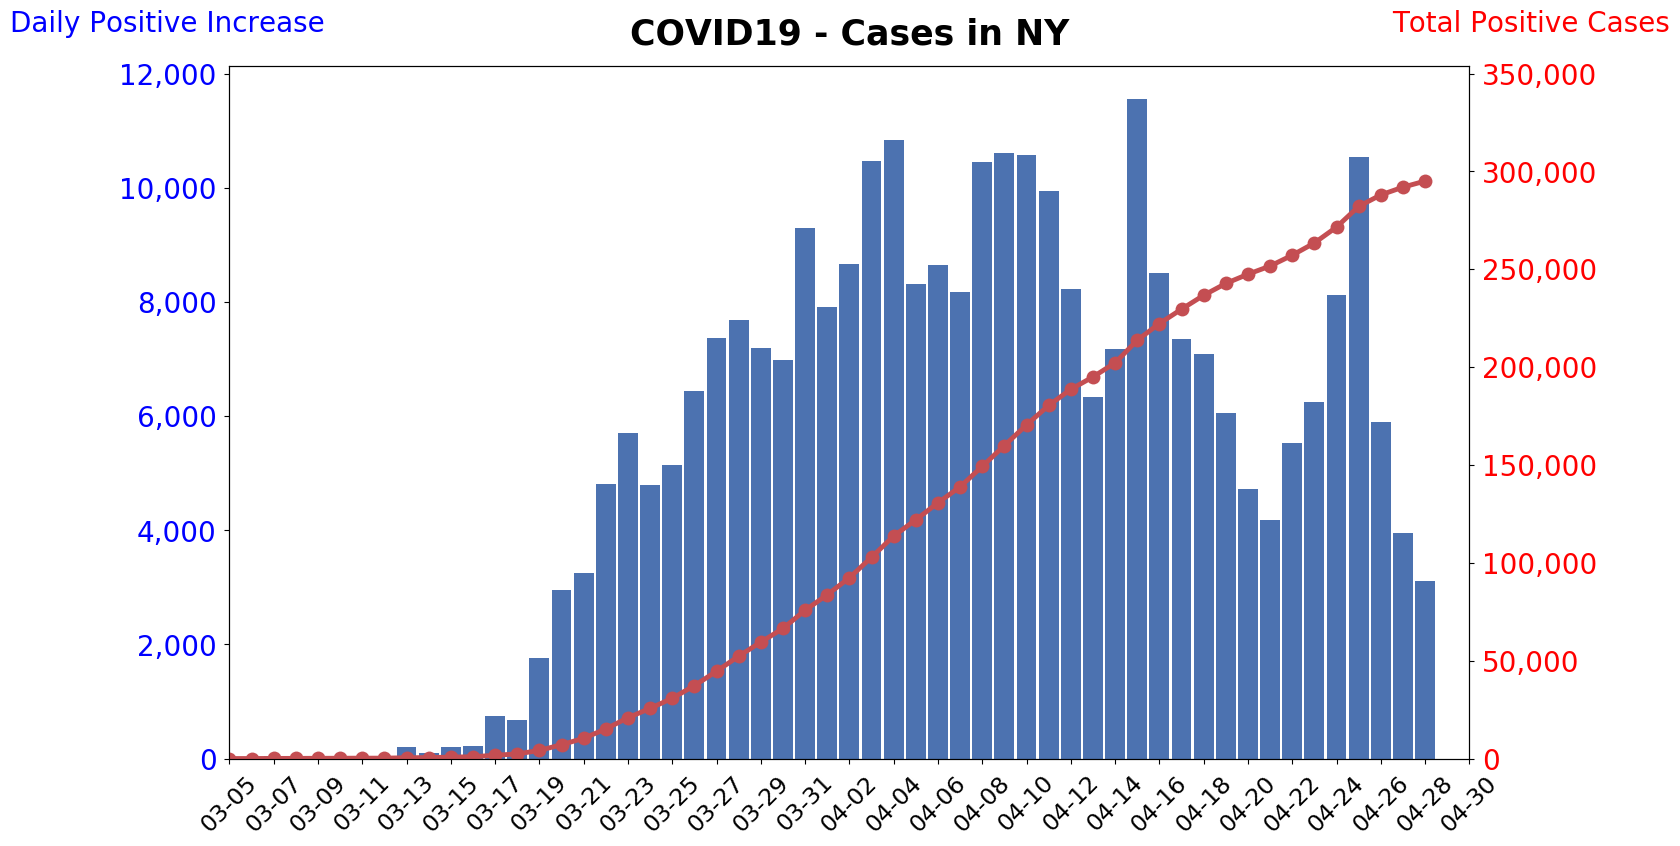

In [173]:
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(16,9))
plt.bar(ny['date'], height=ny['positiveIncrease'], width=0.9);
plt.xticks(fontsize=17,rotation=45);
plt.yticks(color='blue', size=20)
plt.xlim(ny['date'].min().date(),ny['date'].max().date()++ datetime.timedelta(2))
plt.title('COVID19 - Cases in NY', fontsize=25,pad=15,weight ='semibold')
ax.set_ylabel('Daily Positive Increase', fontsize=16, color='blue', size=20,rotation=360)
ax.yaxis.set_label_coords(-0.05,1.04)

ax2 = ax.twinx()
plt.plot(ny['date'],ny['total_cases'], lw=3.5, color='r', marker='.', markersize=20 )
plt.yticks(color='red', size=20)
plt.ylim(0,(ny['total_cases'].max()*1.2))
ax2.set_ylabel('Total Positive Cases', fontsize=16, color='red', size=20, rotation=360, labelpad=35)
ax2.yaxis.set_label_coords(+1.05,1.08)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))


In [174]:
# ny.set_index('date', drop=True, inplace=True)

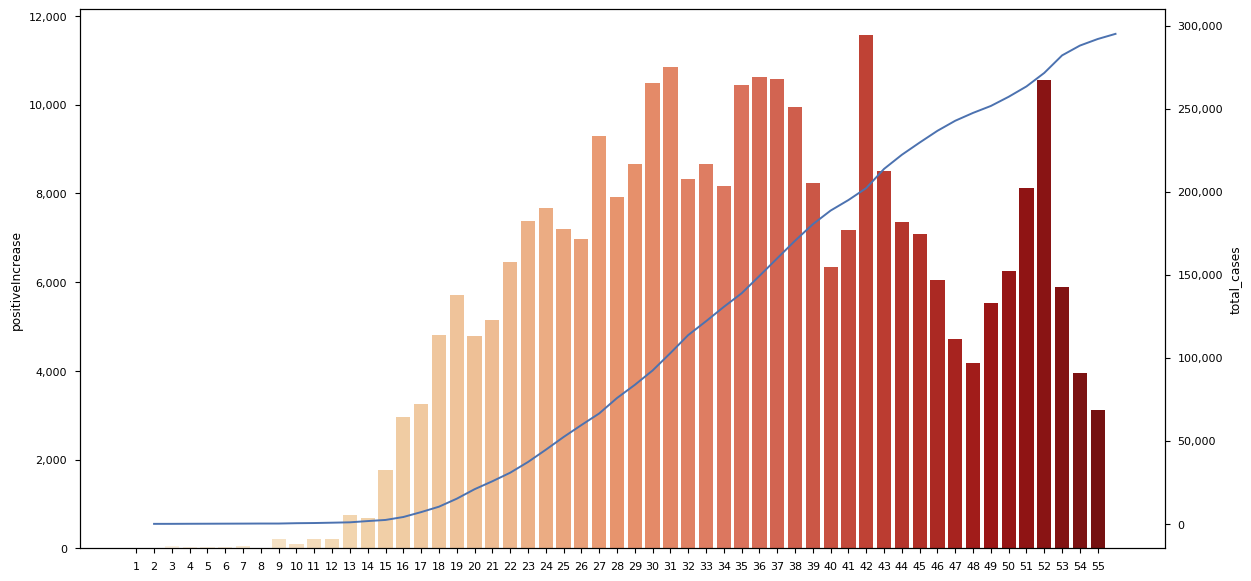

In [175]:
# plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(14,7))
ax1 = sns.barplot(x=ny.index, y='positiveIncrease', data=ny, palette=("OrRd"));
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=ny.index, y='total_cases', data=ny);

# plt.xticks(rotation=45);
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));

In [176]:
ny.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55],
           dtype='int64')

In [177]:
# subplots=True, layout=(5,2), figsize=(18,12),sharey=False,lw=3.5);

In [178]:
usa_covid19.groupby('state')[['positive']].first().sort_values(by='positive').reset_index()[-30:]

,state,positive
26,Delaware,4575.0
27,Nevada,4805.0
28,South Carolina,5613.0
29,Wisconsin,6289.0
30,Mississippi,6342.0
31,Iowa,6376.0
32,Alabama,6687.0
33,Arizona,6948.0
34,Missouri,7303.0
35,Rhode Island,7926.0


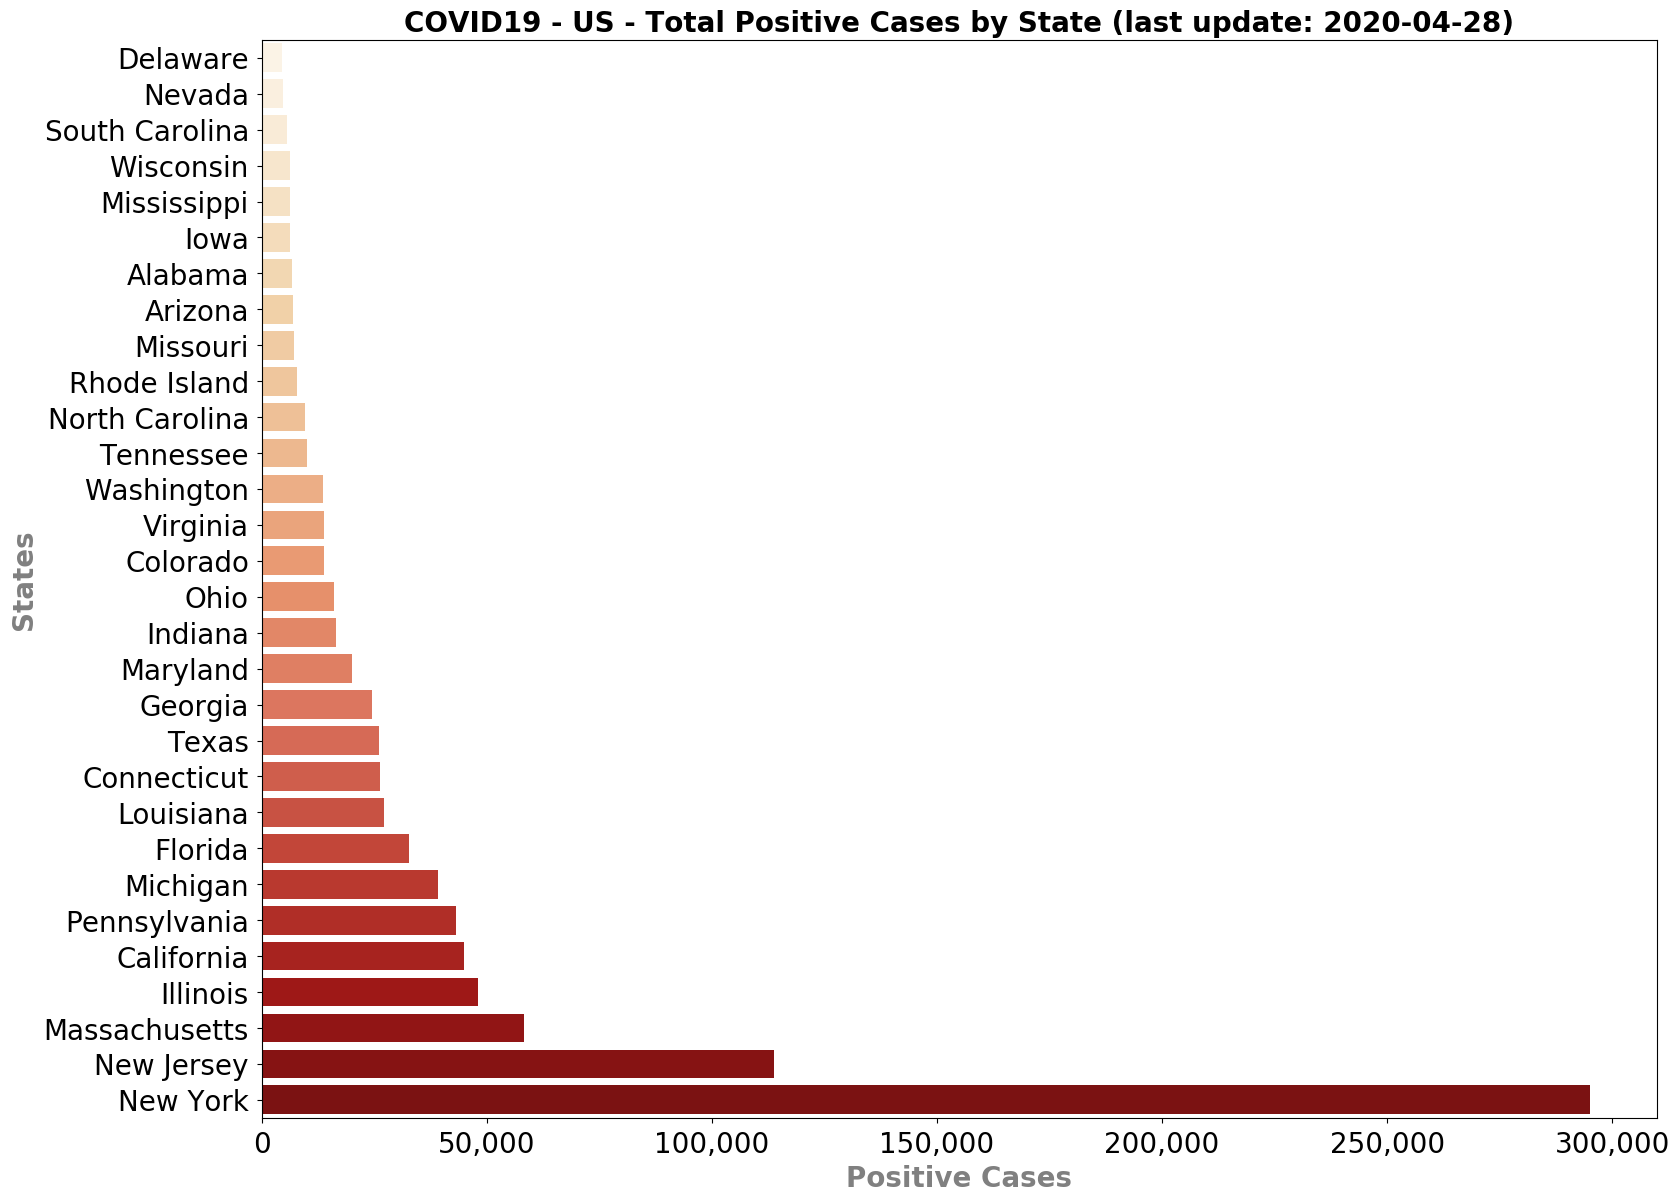

In [195]:
fig, ax = plt.subplots(figsize = (18, 14))
ax = sns.barplot(x="positive",y="state",data=usa_covid19.groupby('state')[['positive']].first()\
            .sort_values(by='positive').reset_index()[-30:],palette=("OrRd")); 
plt.yticks(fontsize=20); plt.xticks(fontsize=20);
ax.set_xlabel("Positive Cases",fontsize=20, color='gray', weight ='semibold')
ax.set_ylabel("States",fontsize=20, color='gray',weight ='semibold')
plt.title(f'COVID19 - US - Total Positive Cases by State (last update: {usa_covid19.date[0].date()})', fontsize=20, weight ='semibold');
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))); 

In [86]:
usa_covid19.groupby('state')[['positive']].first().sort_values(by='positive').reset_index()

,state,positive
0,American Samoa,0.0
1,Northern Mariana Islands,14.0
2,Virgin Islands,59.0
3,Guam,144.0
4,Alaska,345.0
5,Wyoming,370.0
6,Montana,449.0
7,Hawaii,606.0
8,Vermont,855.0
9,North Dakota,942.0


In [87]:
top_us_states_df = usa_covid19[usa_covid19['state'].isin(usa_t5.index.tolist())].copy()


In [88]:
top_us_states_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-04-27,California,43464.0,509945.0,NaN,4878.0,NaN,1499.0,NaN,NaN,NaN,NaN,7e0060a60a33304fbcd09327f77a224932b0befb,2020-04-27T20:00:00Z,1755.0,NaN,553409.0,553409.0,553409.0,6,45.0,0.0,26025.0,1300.0,27325.0
16,2020-04-27,Illinois,45883.0,181745.0,NaN,4672.0,NaN,1249.0,NaN,763.0,NaN,NaN,f628a096fa362b138e1f5e58d5ec982082189e1b,2020-04-27T20:00:00Z,1983.0,NaN,227628.0,227628.0,227628.0,17,50.0,0.0,10696.0,1980.0,12676.0
21,2020-04-27,Massachusetts,56462.0,188425.0,NaN,3892.0,5237.0,1089.0,NaN,NaN,NaN,NaN,6840cb9a1aa06e42fc154748cf79660dd665966f,2020-04-27T20:00:00Z,3003.0,5237.0,244887.0,244887.0,244887.0,25,104.0,133.0,7263.0,1524.0,8787.0
34,2020-04-27,New Jersey,111188.0,116587.0,NaN,6407.0,NaN,1801.0,NaN,1303.0,NaN,NaN,3c5478d5331affe1b9b7d41035688ce607eeaf05,2020-04-27T20:00:00Z,6044.0,NaN,227775.0,227775.0,227775.0,34,106.0,0.0,2481.0,2150.0,4631.0
37,2020-04-27,New York,291996.0,534099.0,NaN,12819.0,57103.0,NaN,NaN,NaN,NaN,23887.0,81c5dcb98b25053fe15d59f8a91c9848761495c2,2020-04-27T20:00:00Z,17303.0,57103.0,826095.0,826095.0,826095.0,36,337.0,0.0,16794.0,3951.0,20745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2020-03-05,New Jersey,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80fa3d5297f9e2b3a46fa82bf816c002d9da0976,2020-03-05T21:00:00Z,NaN,NaN,1.0,1.0,1.0,34,NaN,NaN,NaN,NaN,NaN
2912,2020-03-05,New York,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a5eb1a3c895ee3acd8c87b19363bab6d581b3933,2020-03-05T21:00:00Z,NaN,NaN,122.0,98.0,98.0,36,0.0,0.0,28.0,16.0,44.0
2923,2020-03-04,California,53.0,462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e89c69dcaf7f202257af579a58f86c340eee886a,2020-03-04T21:00:00Z,NaN,NaN,515.0,515.0,515.0,6,NaN,NaN,NaN,NaN,NaN
2926,2020-03-04,Illinois,4.0,124.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c99302904c1de329aeb568cdf92affb6dd5921ad,2020-03-04T21:00:00Z,NaN,NaN,155.0,128.0,128.0,17,NaN,NaN,NaN,NaN,NaN


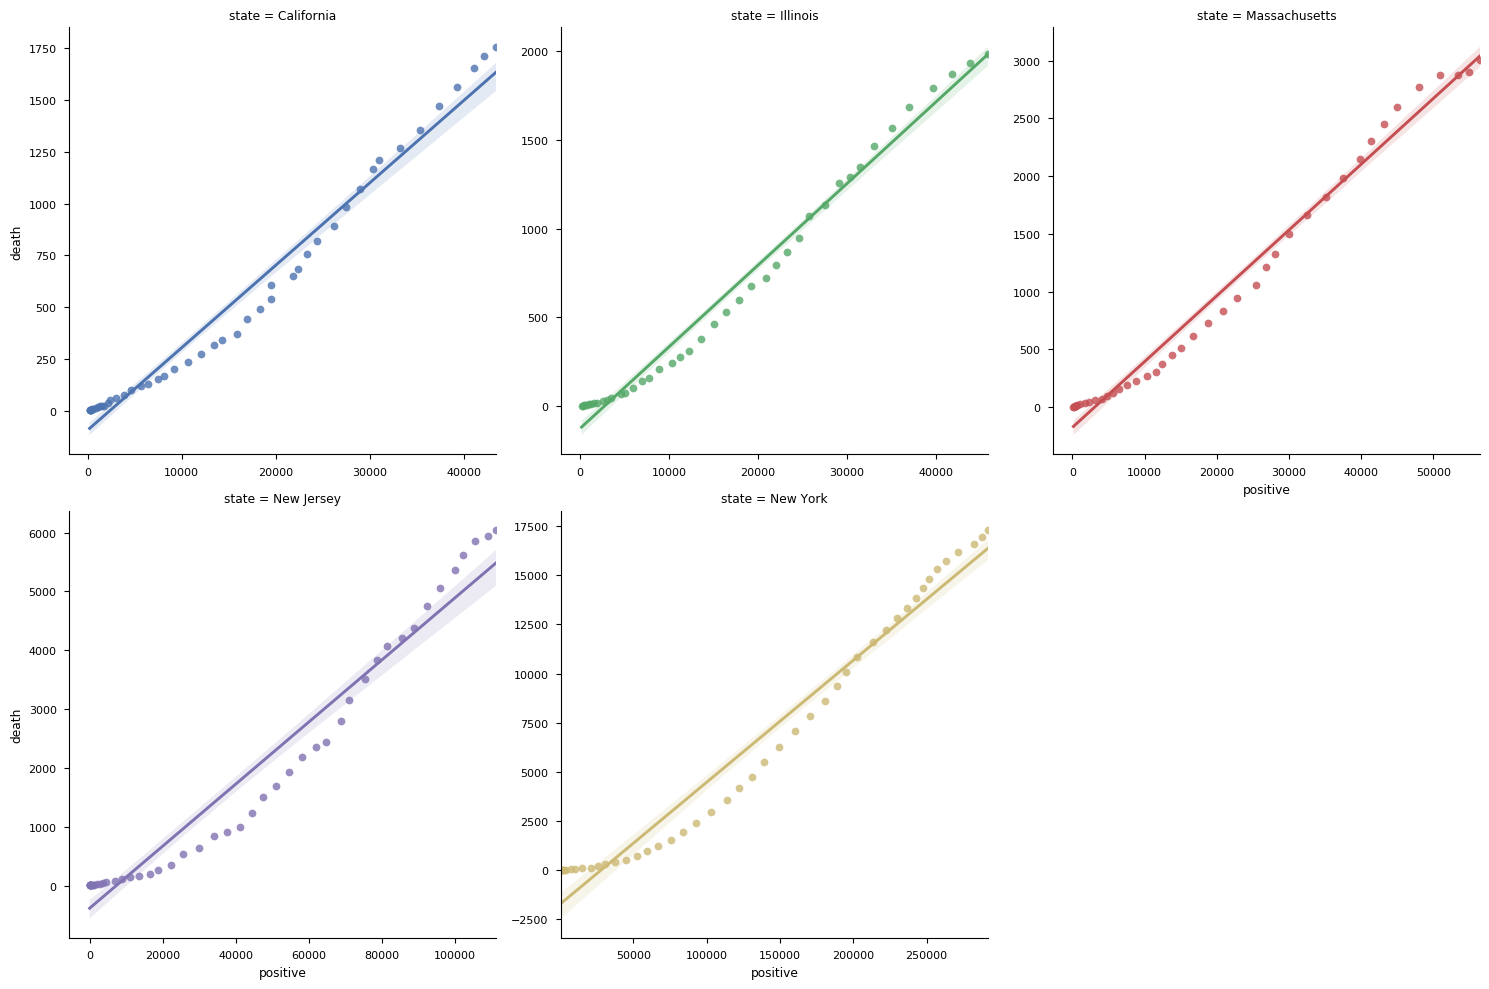

In [89]:
# total deaths to positive cases in each top state
sns.lmplot(x='positive', y='death', col='state', hue='state', col_wrap=3,
           data=top_us_states_df,sharex=False,sharey=False);

In [90]:
top_us_states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-04-27,California,43464.0,509945.0,NaN,4878.0,NaN,1499.0,NaN,NaN,NaN,NaN,7e0060a60a33304fbcd09327f77a224932b0befb,2020-04-27T20:00:00Z,1755.0,NaN,553409.0,553409.0,553409.0,6,45.0,0.0,26025.0,1300.0,27325.0
16,2020-04-27,Illinois,45883.0,181745.0,NaN,4672.0,NaN,1249.0,NaN,763.0,NaN,NaN,f628a096fa362b138e1f5e58d5ec982082189e1b,2020-04-27T20:00:00Z,1983.0,NaN,227628.0,227628.0,227628.0,17,50.0,0.0,10696.0,1980.0,12676.0
21,2020-04-27,Massachusetts,56462.0,188425.0,NaN,3892.0,5237.0,1089.0,NaN,NaN,NaN,NaN,6840cb9a1aa06e42fc154748cf79660dd665966f,2020-04-27T20:00:00Z,3003.0,5237.0,244887.0,244887.0,244887.0,25,104.0,133.0,7263.0,1524.0,8787.0
34,2020-04-27,New Jersey,111188.0,116587.0,NaN,6407.0,NaN,1801.0,NaN,1303.0,NaN,NaN,3c5478d5331affe1b9b7d41035688ce607eeaf05,2020-04-27T20:00:00Z,6044.0,NaN,227775.0,227775.0,227775.0,34,106.0,0.0,2481.0,2150.0,4631.0
37,2020-04-27,New York,291996.0,534099.0,NaN,12819.0,57103.0,NaN,NaN,NaN,NaN,23887.0,81c5dcb98b25053fe15d59f8a91c9848761495c2,2020-04-27T20:00:00Z,17303.0,57103.0,826095.0,826095.0,826095.0,36,337.0,0.0,16794.0,3951.0,20745.0


In [91]:
top_us_states_df['test_positive_rate'] = top_us_states_df['positive'] / top_us_states_df['totalTestResults']
top_us_states_df.groupby('state')['test_positive_rate'].last()

state
California       0.102913
Illinois         0.031250
Massachusetts    1.000000
New Jersey       1.000000
New York         0.111111
Name: test_positive_rate, dtype: float64

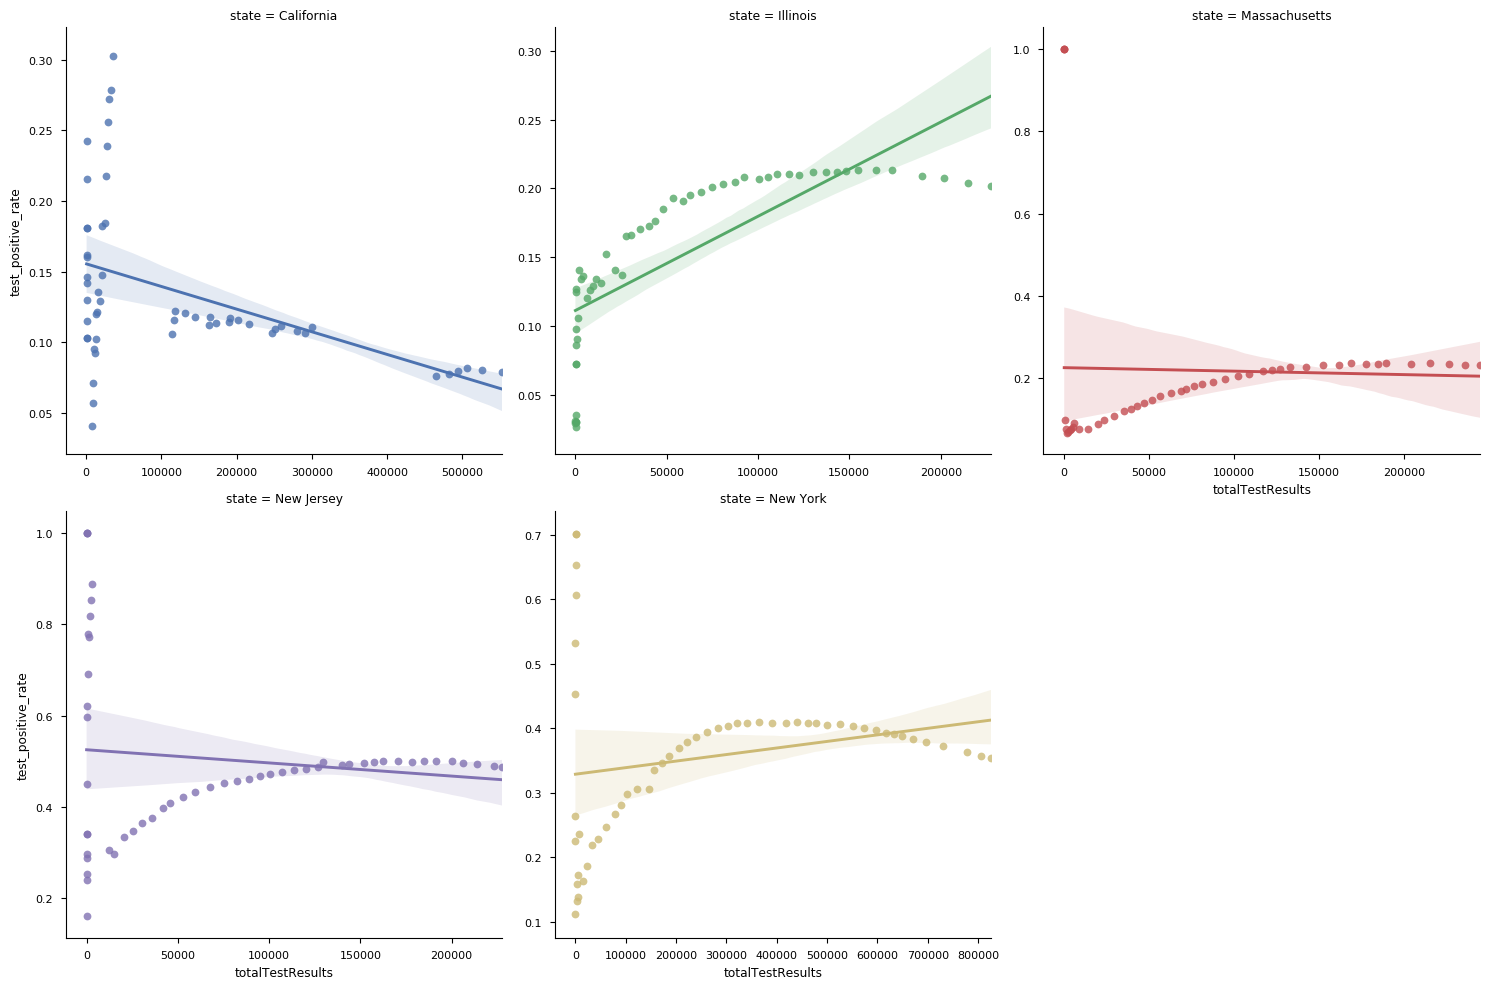

In [92]:
# total deaths to positive cases in each top state
sns.lmplot(x='totalTestResults', y='test_positive_rate', col='state', hue='state', col_wrap=3,
           data=top_us_states_df,sharex=False,sharey=False);